In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import ast
import folium
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#housing_info = pd.read_csv("/content/drive/MyDrive/CSDS312/Cleaned_Apartments.csv", index_col=0)
housing_info = pd.read_csv("/content/drive/Shareddrives/CSDS312Project/Cleaned_Apartments.csv", index_col=0)


In [ ]:
housing_info['sorted_prices'] = housing_info['sorted_prices'].apply(eval)

# Create new columns for each price
for i in range(len(housing_info['sorted_prices'][0])):
    housing_info[f'price_{i+1}'] = [x[i] for x in housing_info['sorted_prices']]

# Drop the original 'sorted_prices' column
housing_info.drop(columns=['sorted_prices'], inplace=True)

# Display the DataFrame
housing_info

city  type  squareMeters  rooms  floor  \
id                                                                         
bac1869ad9c2c1ef444b0ba6d225761a     1     3         77.71      3      3   
fb10546822255a8bd8d52448ce0ae265     1     3         78.60      3      2   
504193ed8e736e687f64d7ba05449972     1     3        100.00      3      4   
bde946f27b37a2dc9219075cb954f929     1     2         96.06      4      3   
c5c9f8850f6ed88e3009a8f251b4edce     1     3         42.57      2      1   
...                                ...   ...           ...    ...    ...   
ad117919faf4e279e748ff5825cab8c9    14     1         78.90      3      2   
307a70d93015d7141669edc0e462e434    14     3         39.00      2      1   
da0d7d8d1ab4c296faddeb207804ed17    14     2         37.30      2     10   
43ba1ff7e0804730281149d62fc9a48b    14     3         95.00      4      1   
db1312ac01eb06a84110de11839730e2    14     2         74.00      3      1   

                                  floorCount  buildYear   latitude  longitude  \
id                                                                              
bac1869ad9c2c1ef444b0ba6d225761a           3       1925  53.433019  14.569775   
fb10546822255a8bd8d52448ce0ae265           4       1929  53.432833  14.548187   
504193ed8e736e687f64d7ba05449972           4       1930  53.436494  14.572026   
bde946f27b37a2dc9219075cb954f929           3       2009  53.465600  14.541539   
c5c9f8850f6ed88e3009a8f251b4edce           1       1938  53.495690  14.584651   
...                                      ...        ...        ...        ...   
ad117919faf4e279e748ff5825cab8c9           2       2004  53.108380  17.980800   
307a70d93015d7141669edc0e462e434           4       1914  53.126000  18.007900   
da0d7d8d1ab4c296faddeb207804ed17          10       1980  53.124984  18.049752   
43ba1ff7e0804730281149d62fc9a48b           3       1893  53.126000  18.007900   
db1312ac01eb06a84110de11839730e2           3       1959  53.105804  18.054872   

                                  centreDistance  ...  hasElevator  \
id                                                ...                
bac1869ad9c2c1ef444b0ba6d225761a            1.22  ...            0   
fb10546822255a8bd8d52448ce0ae265            1.35  ...            0   
504193ed8e736e687f64d7ba05449972            1.63  ...            0   
bde946f27b37a2dc9219075cb954f929            4.87  ...            0   
c5c9f8850f6ed88e3009a8f251b4edce            8.19  ...            0   
...                                          ...  ...          ...   
ad117919faf4e279e748ff5825cab8c9            2.02  ...            0   
307a70d93015d7141669edc0e462e434            0.65  ...            0   
da0d7d8d1ab4c296faddeb207804ed17            3.29  ...            1   
43ba1ff7e0804730281149d62fc9a48b            0.65  ...            0   
db1312ac01eb06a84110de11839730e2            4.04  ...            0   

                                  hasSecurity  hasStorageRoom  price_1  \
id                                                                       
bac1869ad9c2c1ef444b0ba6d225761a            0               1   550000   
fb10546822255a8bd8d52448ce0ae265            0               1   440000   
504193ed8e736e687f64d7ba05449972            0               1   799000   
bde946f27b37a2dc9219075cb954f929            0               0   768000   
c5c9f8850f6ed88e3009a8f251b4edce            0               1   389000   
...                                       ...             ...      ...   
ad117919faf4e279e748ff5825cab8c9            0               1   640000   
307a70d93015d7141669edc0e462e434            0               1   205000   
da0d7d8d1ab4c296faddeb207804ed17            0               1   219000   
43ba1ff7e0804730281149d62fc9a48b            0               1   599000   
db1312ac01eb06a84110de11839730e2            0               1   389900   

                                  price_2  price_3  price_4  price_5  price_6  \
id                                  

In [ ]:
housing_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, bac1869ad9c2c1ef444b0ba6d225761a to db1312ac01eb06a84110de11839730e2
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  147 non-null    int64  
 1   type                  147 non-null    int64  
 2   squareMeters          147 non-null    float64
 3   rooms                 147 non-null    int64  
 4   floor                 147 non-null    int64  
 5   floorCount            147 non-null    int64  
 6   buildYear             147 non-null    int64  
 7   latitude              147 non-null    float64
 8   longitude             147 non-null    float64
 9   centreDistance        147 non-null    float64
 10  poiCount              147 non-null    int64  
 11  schoolDistance        147 non-null    float64
 12  clinicDistance        147 non-null    float64
 13  postOfficeDistance    147 non-null    float64
 14  kindergartenDistanc

In [ ]:
house_info=pd.read_csv("/content/drive/Shareddrives/CSDS312Project/Cleaned_Apartments.csv", index_col=0)
house_info

city  type  squareMeters  rooms  floor  \
id                                                                         
bac1869ad9c2c1ef444b0ba6d225761a     1     3         77.71      3      3   
fb10546822255a8bd8d52448ce0ae265     1     3         78.60      3      2   
504193ed8e736e687f64d7ba05449972     1     3        100.00      3      4   
bde946f27b37a2dc9219075cb954f929     1     2         96.06      4      3   
c5c9f8850f6ed88e3009a8f251b4edce     1     3         42.57      2      1   
...                                ...   ...           ...    ...    ...   
ad117919faf4e279e748ff5825cab8c9    14     1         78.90      3      2   
307a70d93015d7141669edc0e462e434    14     3         39.00      2      1   
da0d7d8d1ab4c296faddeb207804ed17    14     2         37.30      2     10   
43ba1ff7e0804730281149d62fc9a48b    14     3         95.00      4      1   
db1312ac01eb06a84110de11839730e2    14     2         74.00      3      1   

                                  floorCount  buildYear   latitude  longitude  \
id                                                                              
bac1869ad9c2c1ef444b0ba6d225761a           3       1925  53.433019  14.569775   
fb10546822255a8bd8d52448ce0ae265           4       1929  53.432833  14.548187   
504193ed8e736e687f64d7ba05449972           4       1930  53.436494  14.572026   
bde946f27b37a2dc9219075cb954f929           3       2009  53.465600  14.541539   
c5c9f8850f6ed88e3009a8f251b4edce           1       1938  53.495690  14.584651   
...                                      ...        ...        ...        ...   
ad117919faf4e279e748ff5825cab8c9           2       2004  53.108380  17.980800   
307a70d93015d7141669edc0e462e434           4       1914  53.126000  18.007900   
da0d7d8d1ab4c296faddeb207804ed17          10       1980  53.124984  18.049752   
43ba1ff7e0804730281149d62fc9a48b           3       1893  53.126000  18.007900   
db1312ac01eb06a84110de11839730e2           3       1959  53.105804  18.054872   

                                  centreDistance  ...  pharmacyDistance  \
id                                                ...                     
bac1869ad9c2c1ef444b0ba6d225761a            1.22  ...             0.430   
fb10546822255a8bd8d52448ce0ae265            1.35  ...             0.089   
504193ed8e736e687f64d7ba05449972            1.63  ...             0.191   
bde946f27b37a2dc9219075cb954f929            4.87  ...             0.366   
c5c9f8850f6ed88e3009a8f251b4edce            8.19  ...             0.033   
...                                          ...  ...               ...   
ad117919faf4e279e748ff5825cab8c9            2.02  ...             0.591   
307a70d93015d7141669edc0e462e434            0.65  ...             0.205   
da0d7d8d1ab4c296faddeb207804ed17            3.29  ...             0.155   
43ba1ff7e0804730281149d62fc9a48b            0.65  ...             0.205   
db1312ac01eb06a84110de11839730e2            4.04  ...             0.277   

                                  ownership  buildingMaterial  condition  \
id                                                                         
bac1869ad9c2c1ef444b0ba6d225761a          0                 0          0   
fb10546822255a8bd8d52448ce0ae265          0                 0          1   
504193ed8e736e687f64d7ba05449972          0                 0          1   
bde946f27b37a2dc9219075cb954f929          0                 0          1   
c5c9f8850f6ed88e3009a8f251b4edce          0                 0          1   
...                                     ...               ...        ...   
ad117919faf4e279e748ff5825cab8c9          0                 0          1   
307a70d93015d7141669edc0e462e434          0                 0          0   
da0d7d8d1ab4c296faddeb207804ed17          1                 1          0   
43ba1ff7e0804730281149d62fc9a48b          0                 0          0   
db1312ac01eb06a84110de11839730e2          0                 0          0   

                          

In [ ]:
house_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, bac1869ad9c2c1ef444b0ba6d225761a to db1312ac01eb06a84110de11839730e2
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  147 non-null    int64  
 1   type                  147 non-null    int64  
 2   squareMeters          147 non-null    float64
 3   rooms                 147 non-null    int64  
 4   floor                 147 non-null    int64  
 5   floorCount            147 non-null    int64  
 6   buildYear             147 non-null    int64  
 7   latitude              147 non-null    float64
 8   longitude             147 non-null    float64
 9   centreDistance        147 non-null    float64
 10  poiCount              147 non-null    int64  
 11  schoolDistance        147 non-null    float64
 12  clinicDistance        147 non-null    float64
 13  postOfficeDistance    147 non-null    float64
 14  kindergartenDistanc

Visuals

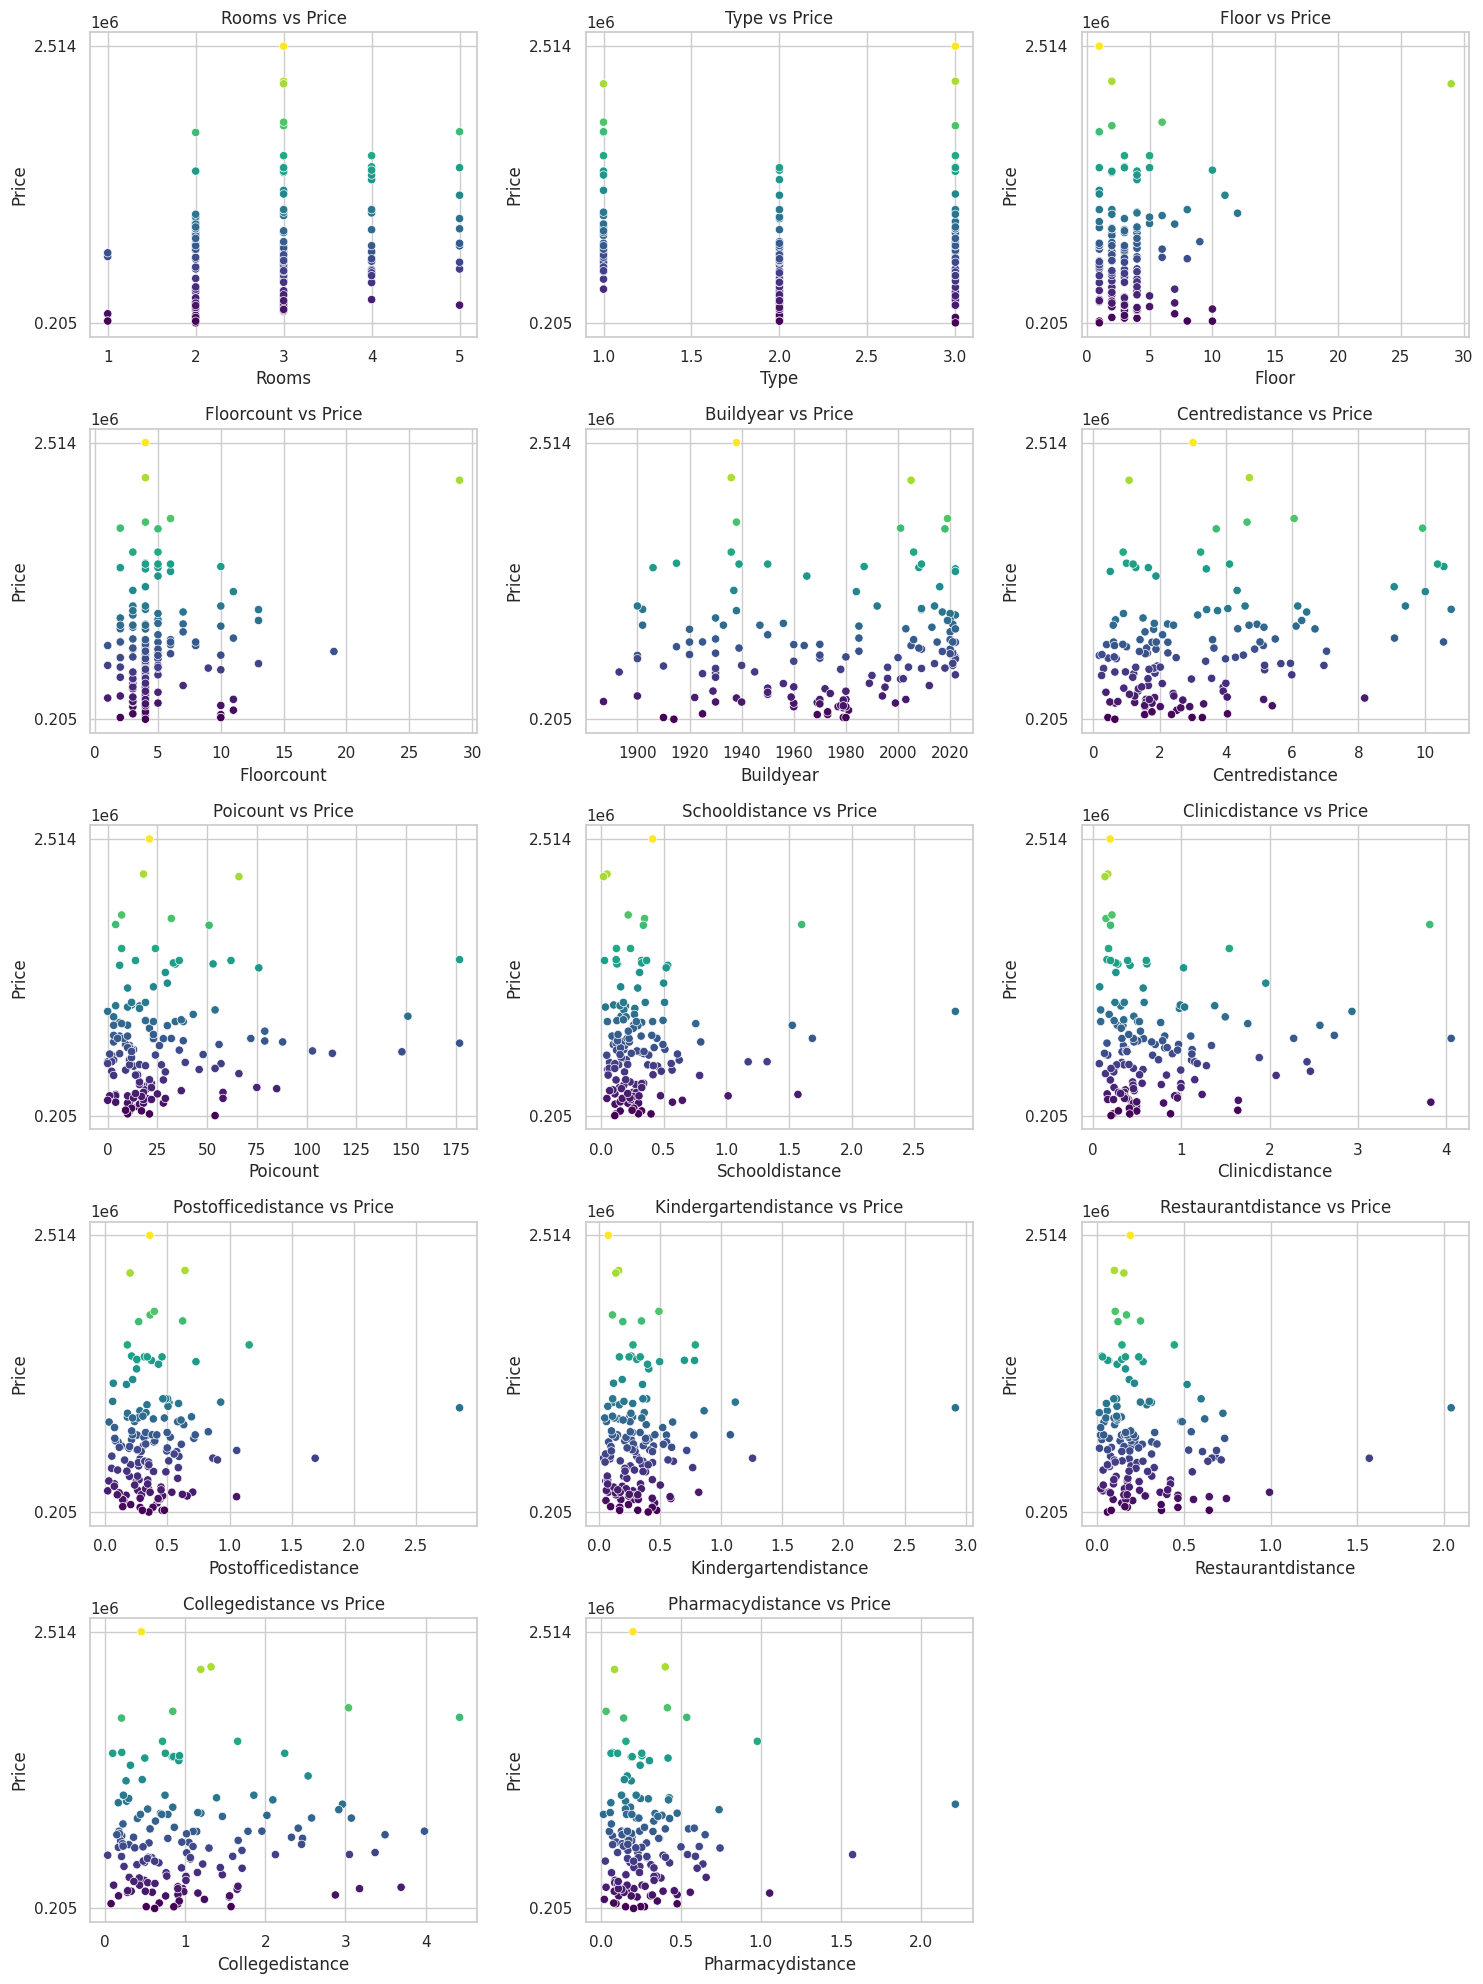

In [ ]:
sns.set(style="whitegrid")

# Convert sorted_prices from string to list and then calculate the average
def convert_prices(price_str):
    price_list = ast.literal_eval(price_str)
    if isinstance(price_list, list):
        return np.mean(price_list)
    else:
        return price_list

house_info['sorted_prices'] = house_info['sorted_prices'].apply(convert_prices)

def plot_attribute_vs_price(attribute, ax):
    sns.scatterplot(data=house_info, x=attribute, y='sorted_prices', hue='sorted_prices', palette='viridis', legend=False, ax=ax)
    ax.set_title(f'{attribute.capitalize()} vs Price')
    ax.set_xlabel(attribute.capitalize())
    ax.set_ylabel('Price')

    min_price = house_info['sorted_prices'].min()
    max_price = house_info['sorted_prices'].max()
    #min_price = eval(house_info['sorted_prices'].min())[0]
    #max_price = eval(house_info['sorted_prices'].max())[0]
    # Set only min and max y ticks
    ax.set_yticks([ min_price,max_price])

attributes = ['rooms', 'type', 'floor', 'floorCount', 'buildYear', 'centreDistance', 'poiCount',
              'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
              'restaurantDistance', 'collegeDistance', 'pharmacyDistance']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each attribute
for i, attr in enumerate(attributes):
    plot_attribute_vs_price(attr, axes[i])

# Hide any remaining subplots
for j in range(len(attributes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

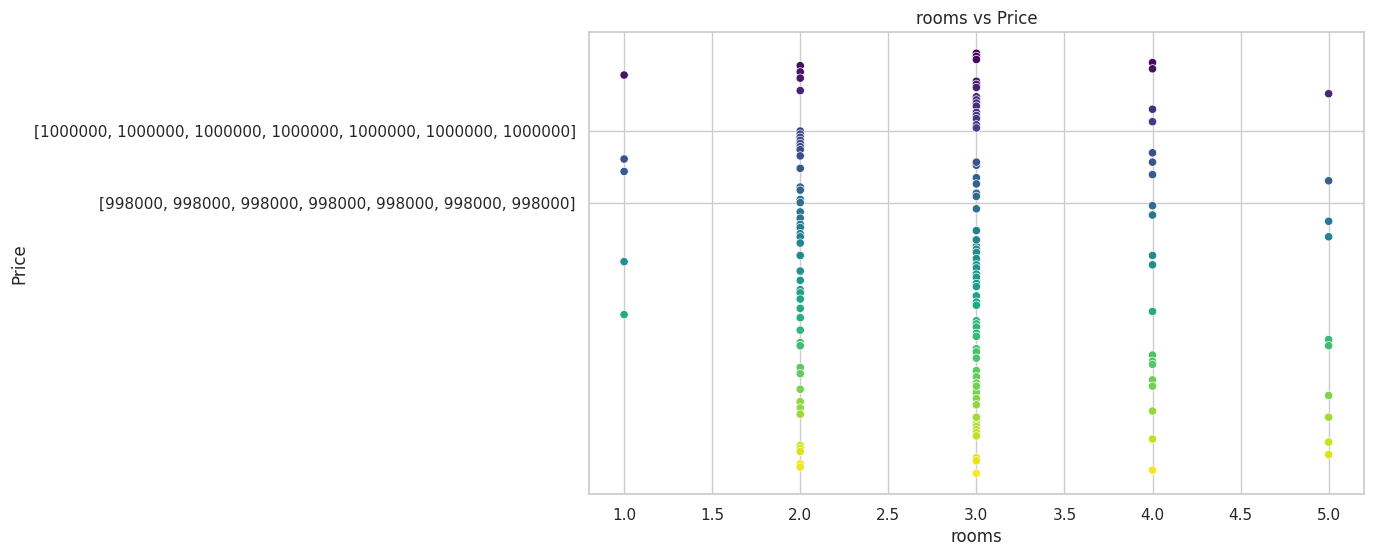

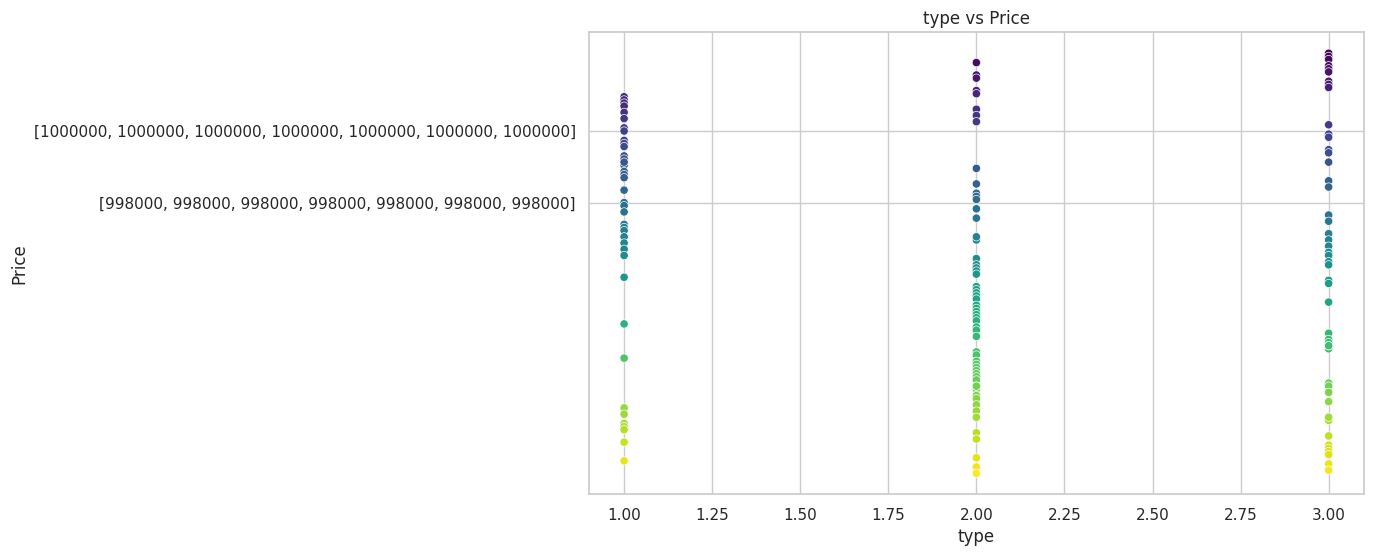

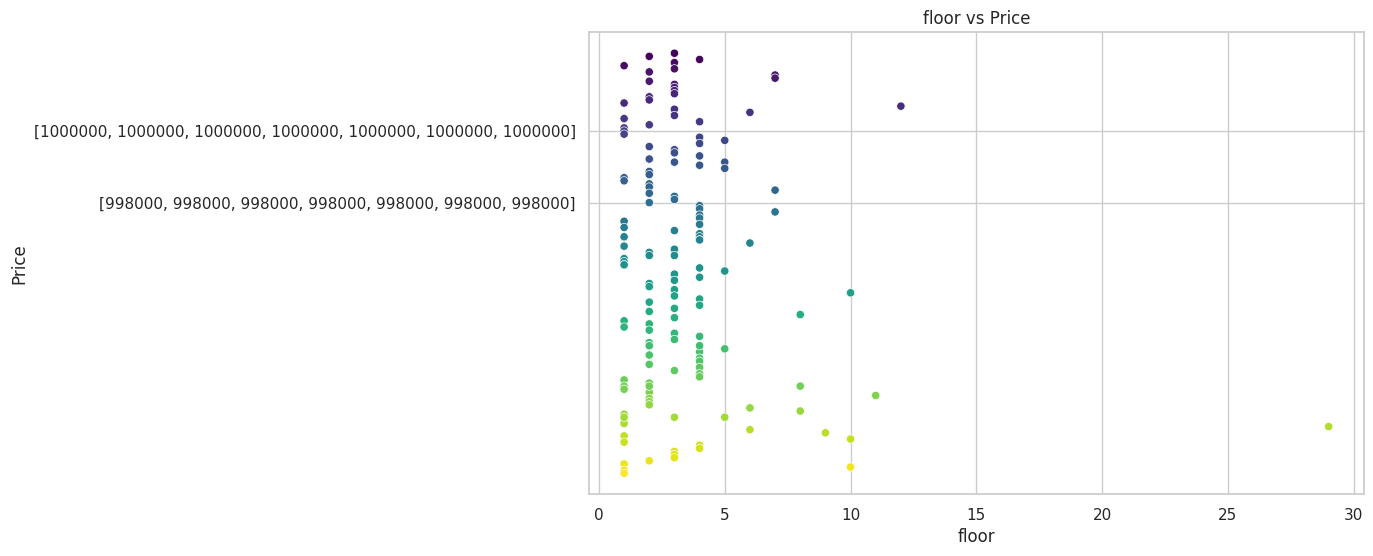

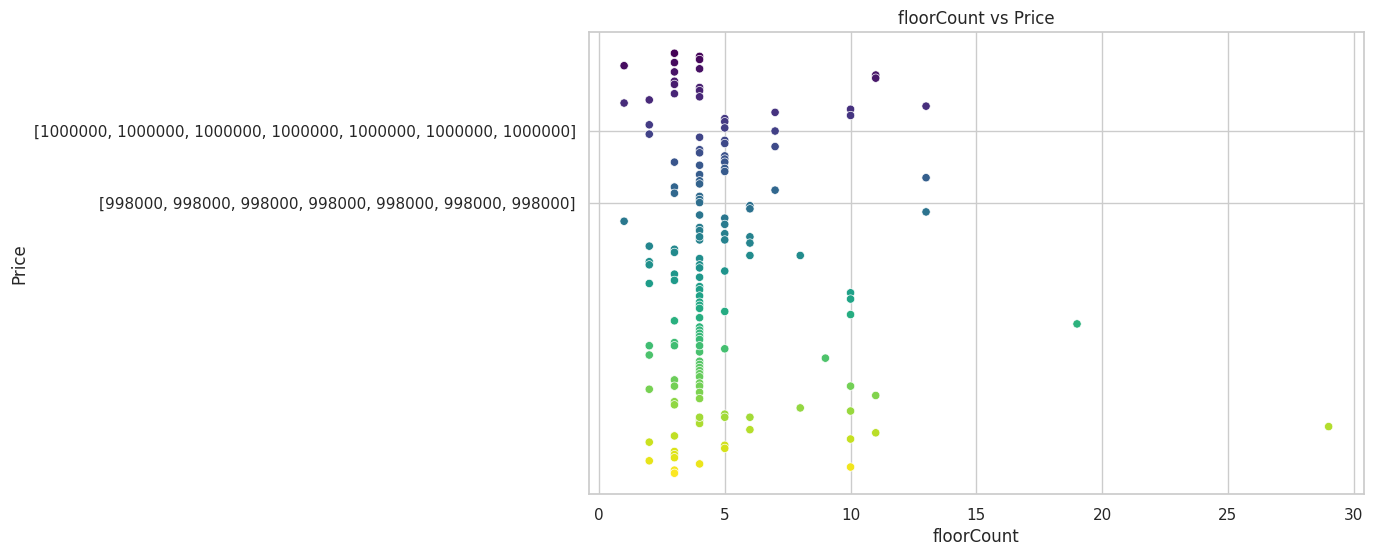

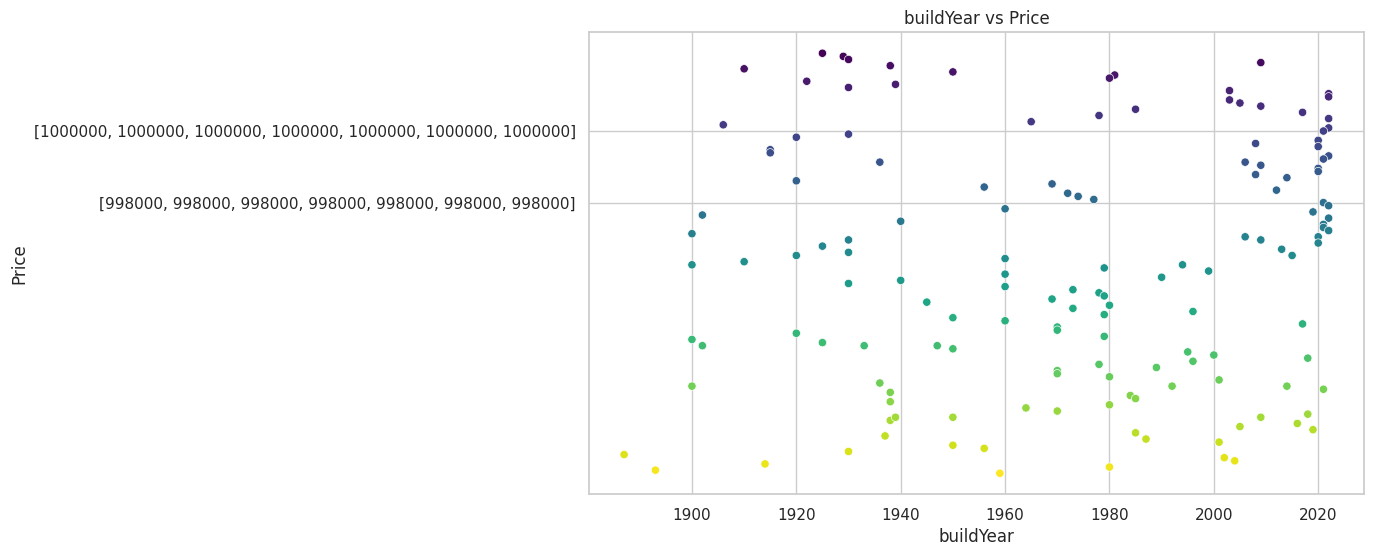

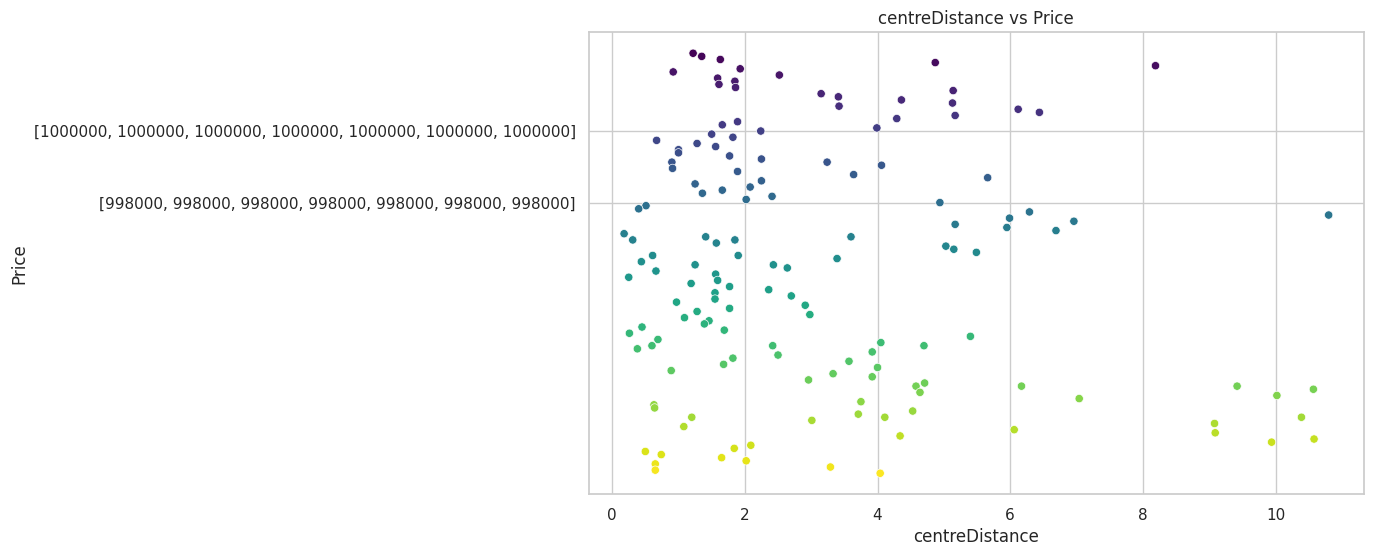

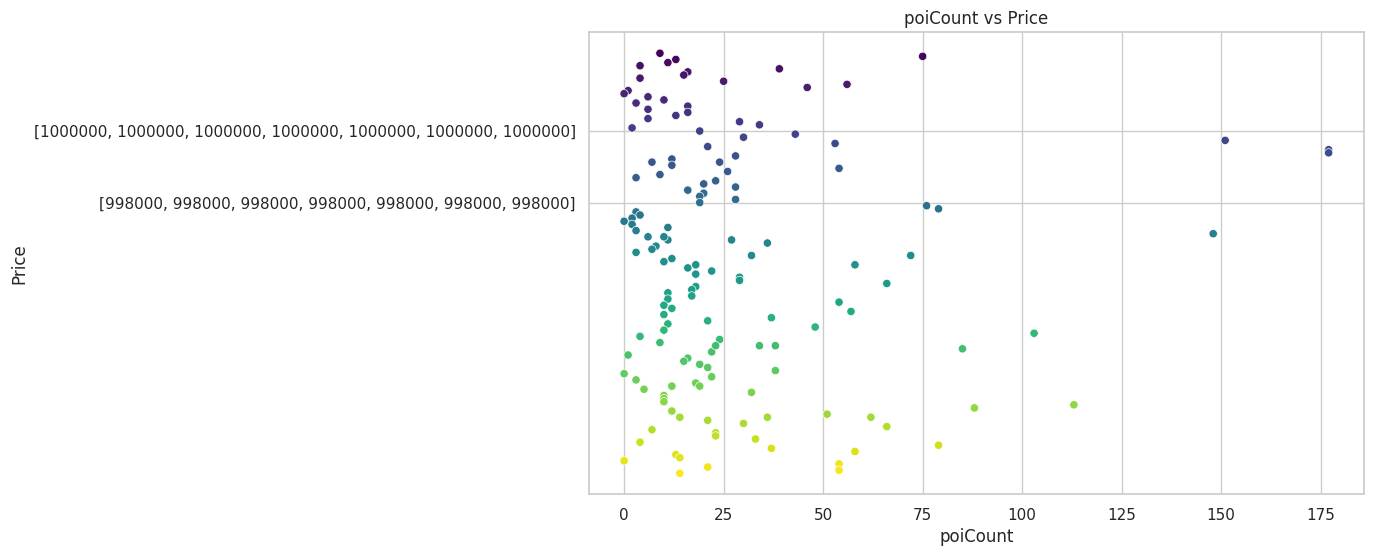

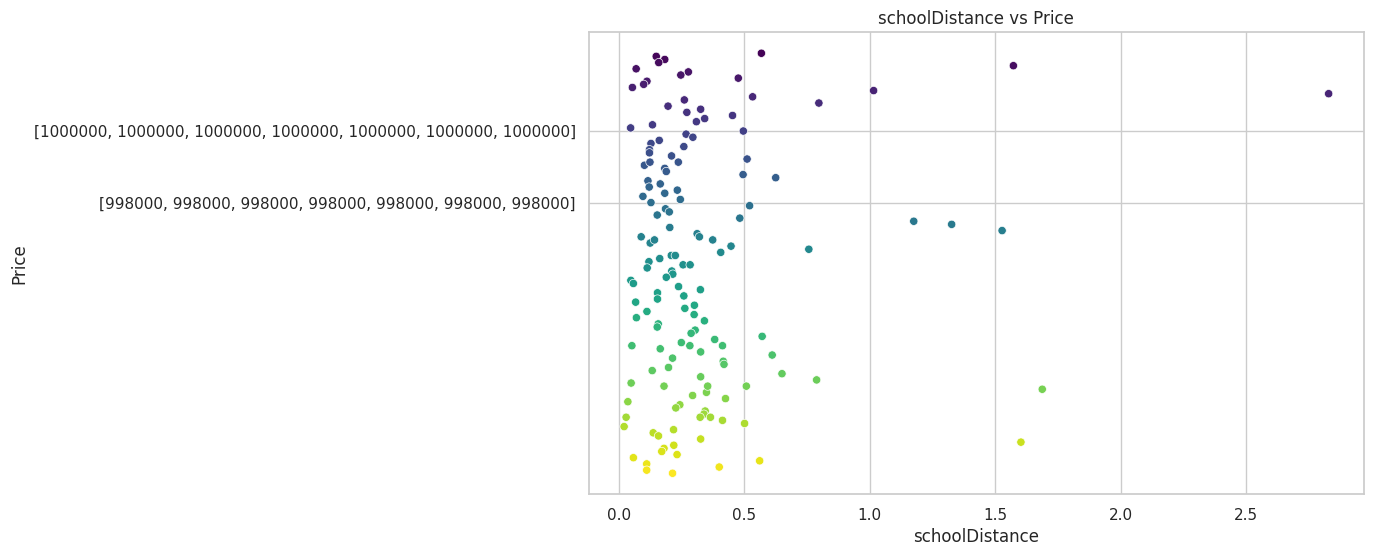

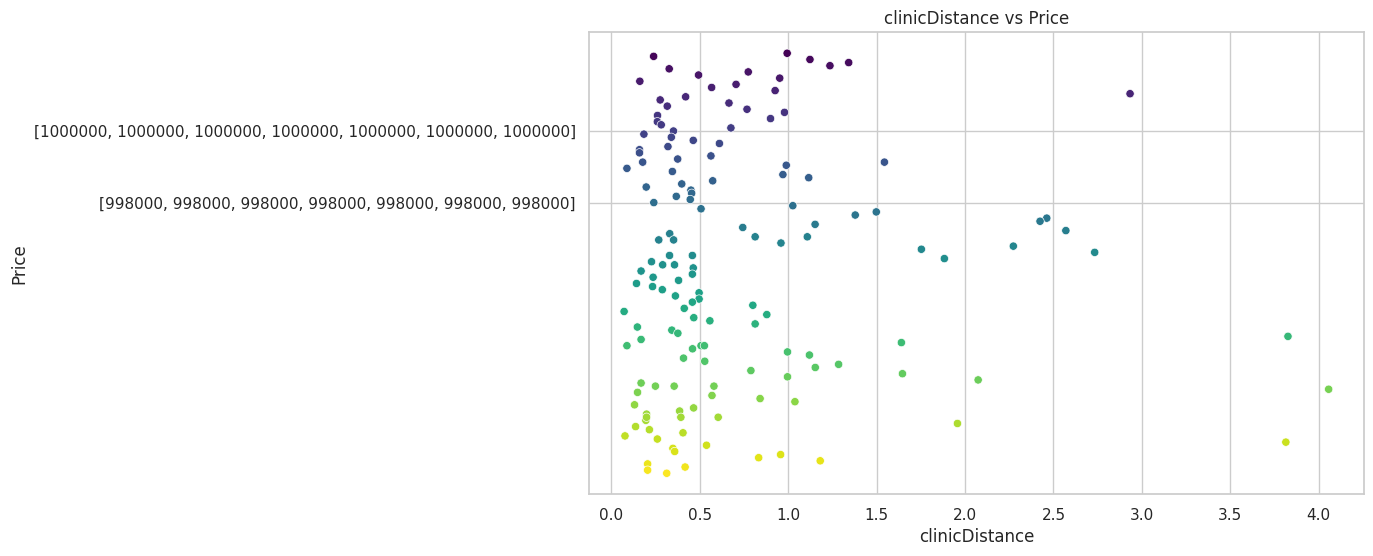

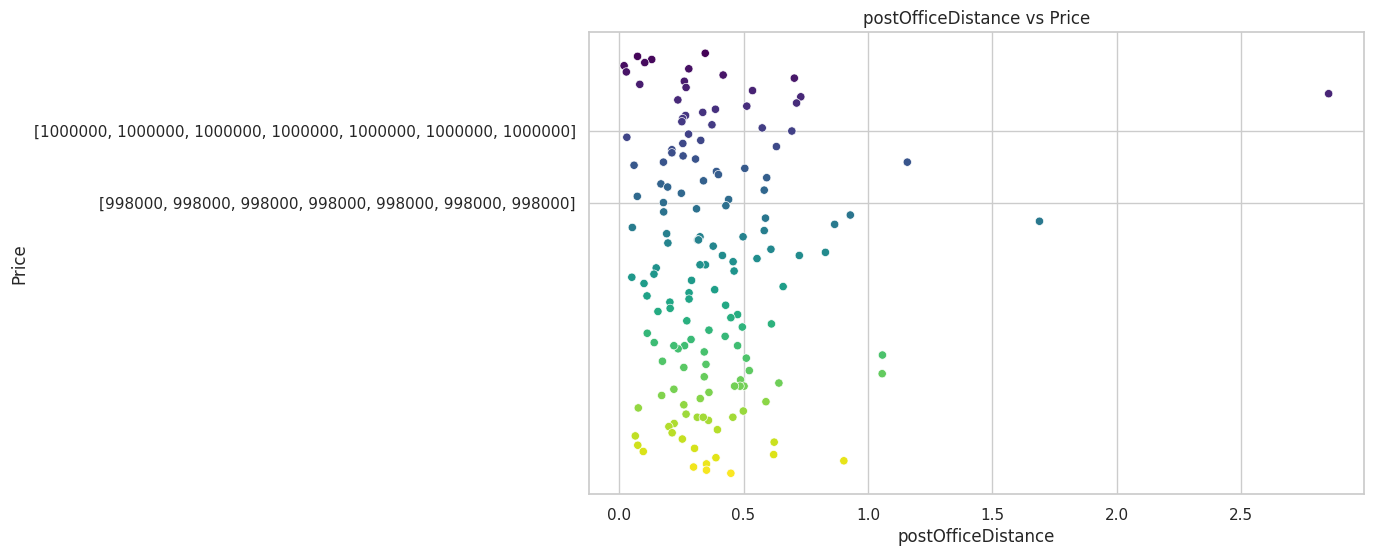

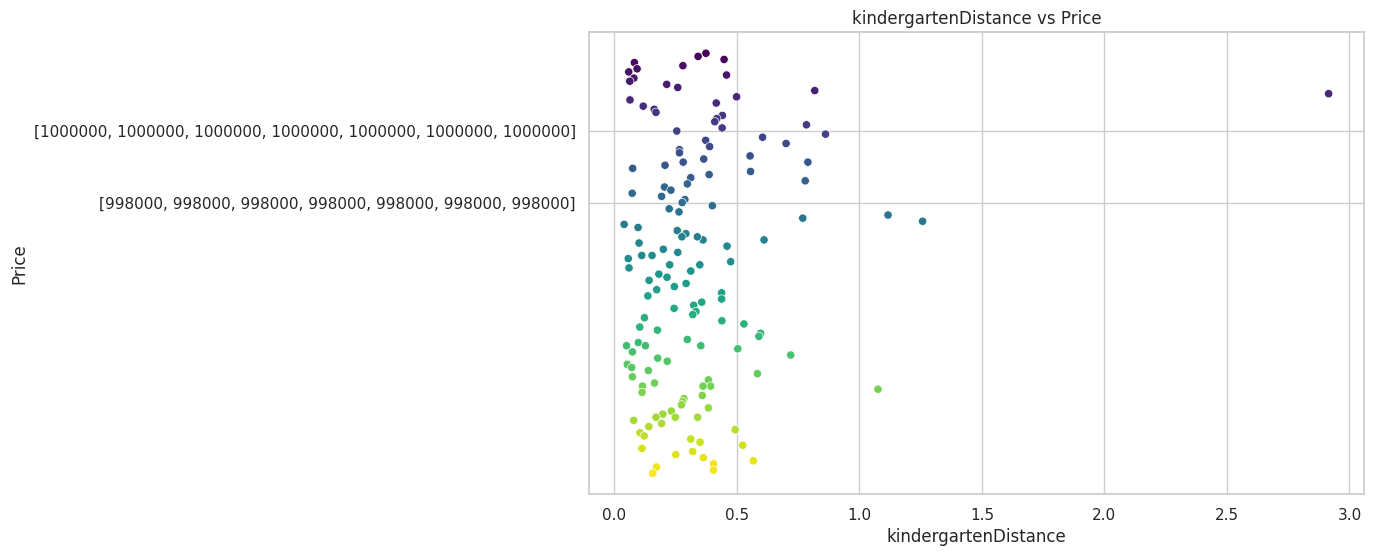

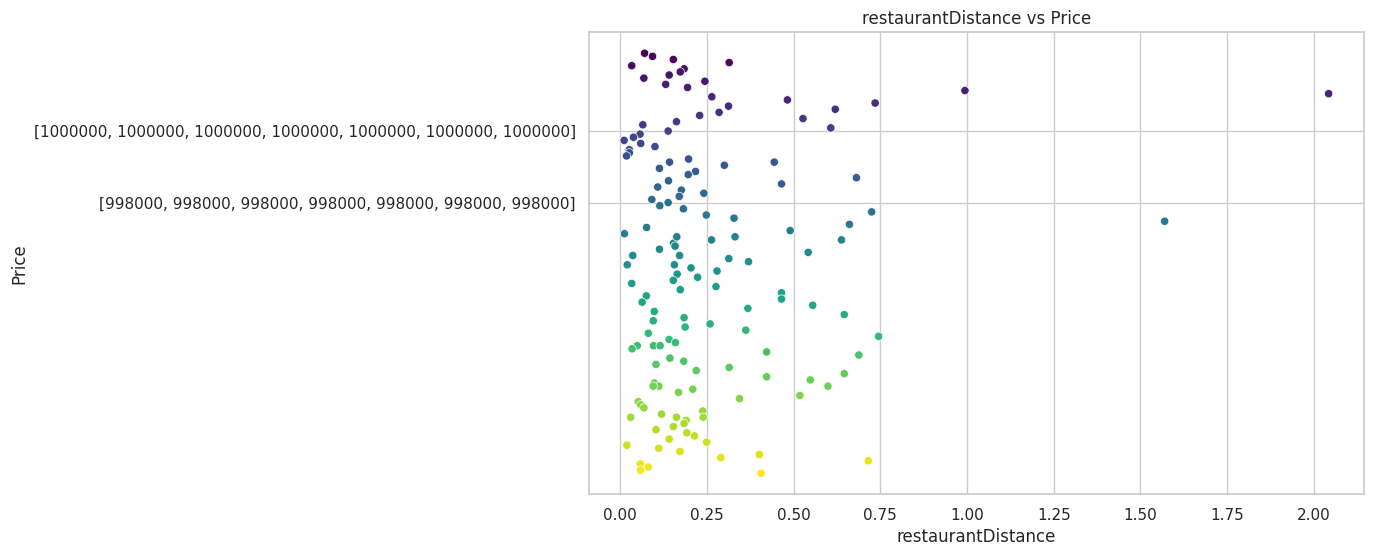

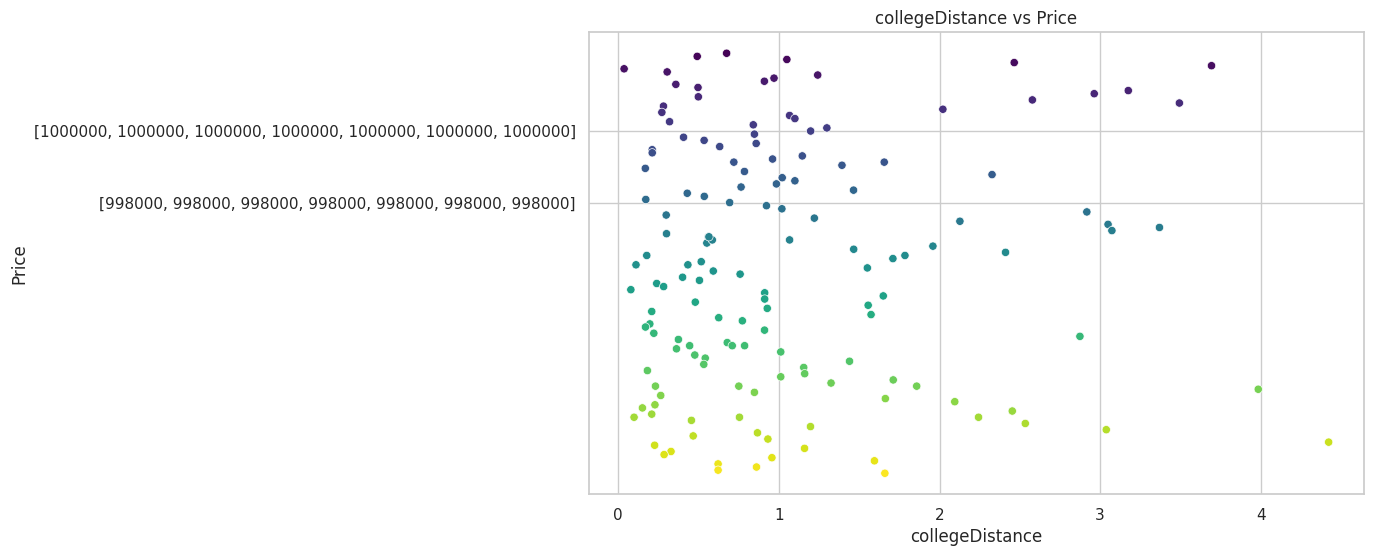

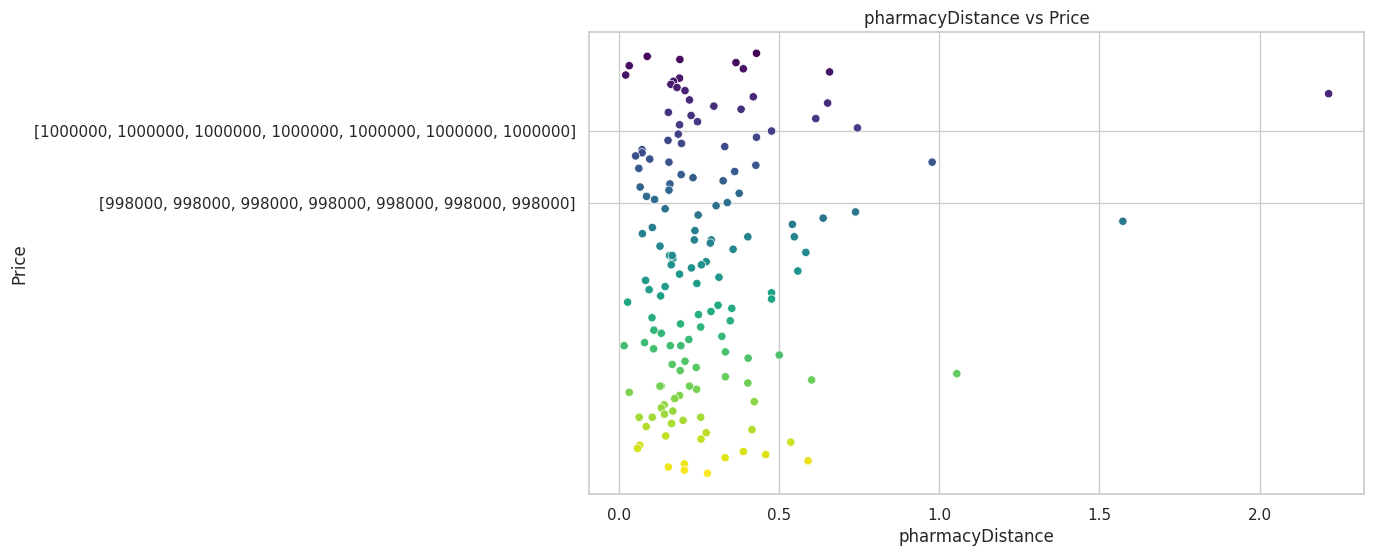

In [ ]:
sns.set(style="whitegrid")

def plot_attribute_vs_price(attribute):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=house_info, x=attribute, y='sorted_prices', hue='sorted_prices', palette='viridis', legend = False)
    plt.title(f'{attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')

    min_price = house_info['sorted_prices'].min()
    max_price = house_info['sorted_prices'].max()
    # Set only min and max y ticks
    plt.yticks([min_price, max_price])
    plt.show()

attributes = ['rooms','type', 'floor', 'floorCount', 'buildYear', 'centreDistance', 'poiCount',
              'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
              'restaurantDistance', 'collegeDistance', 'pharmacyDistance']

for attr in attributes:
    plot_attribute_vs_price(attr)

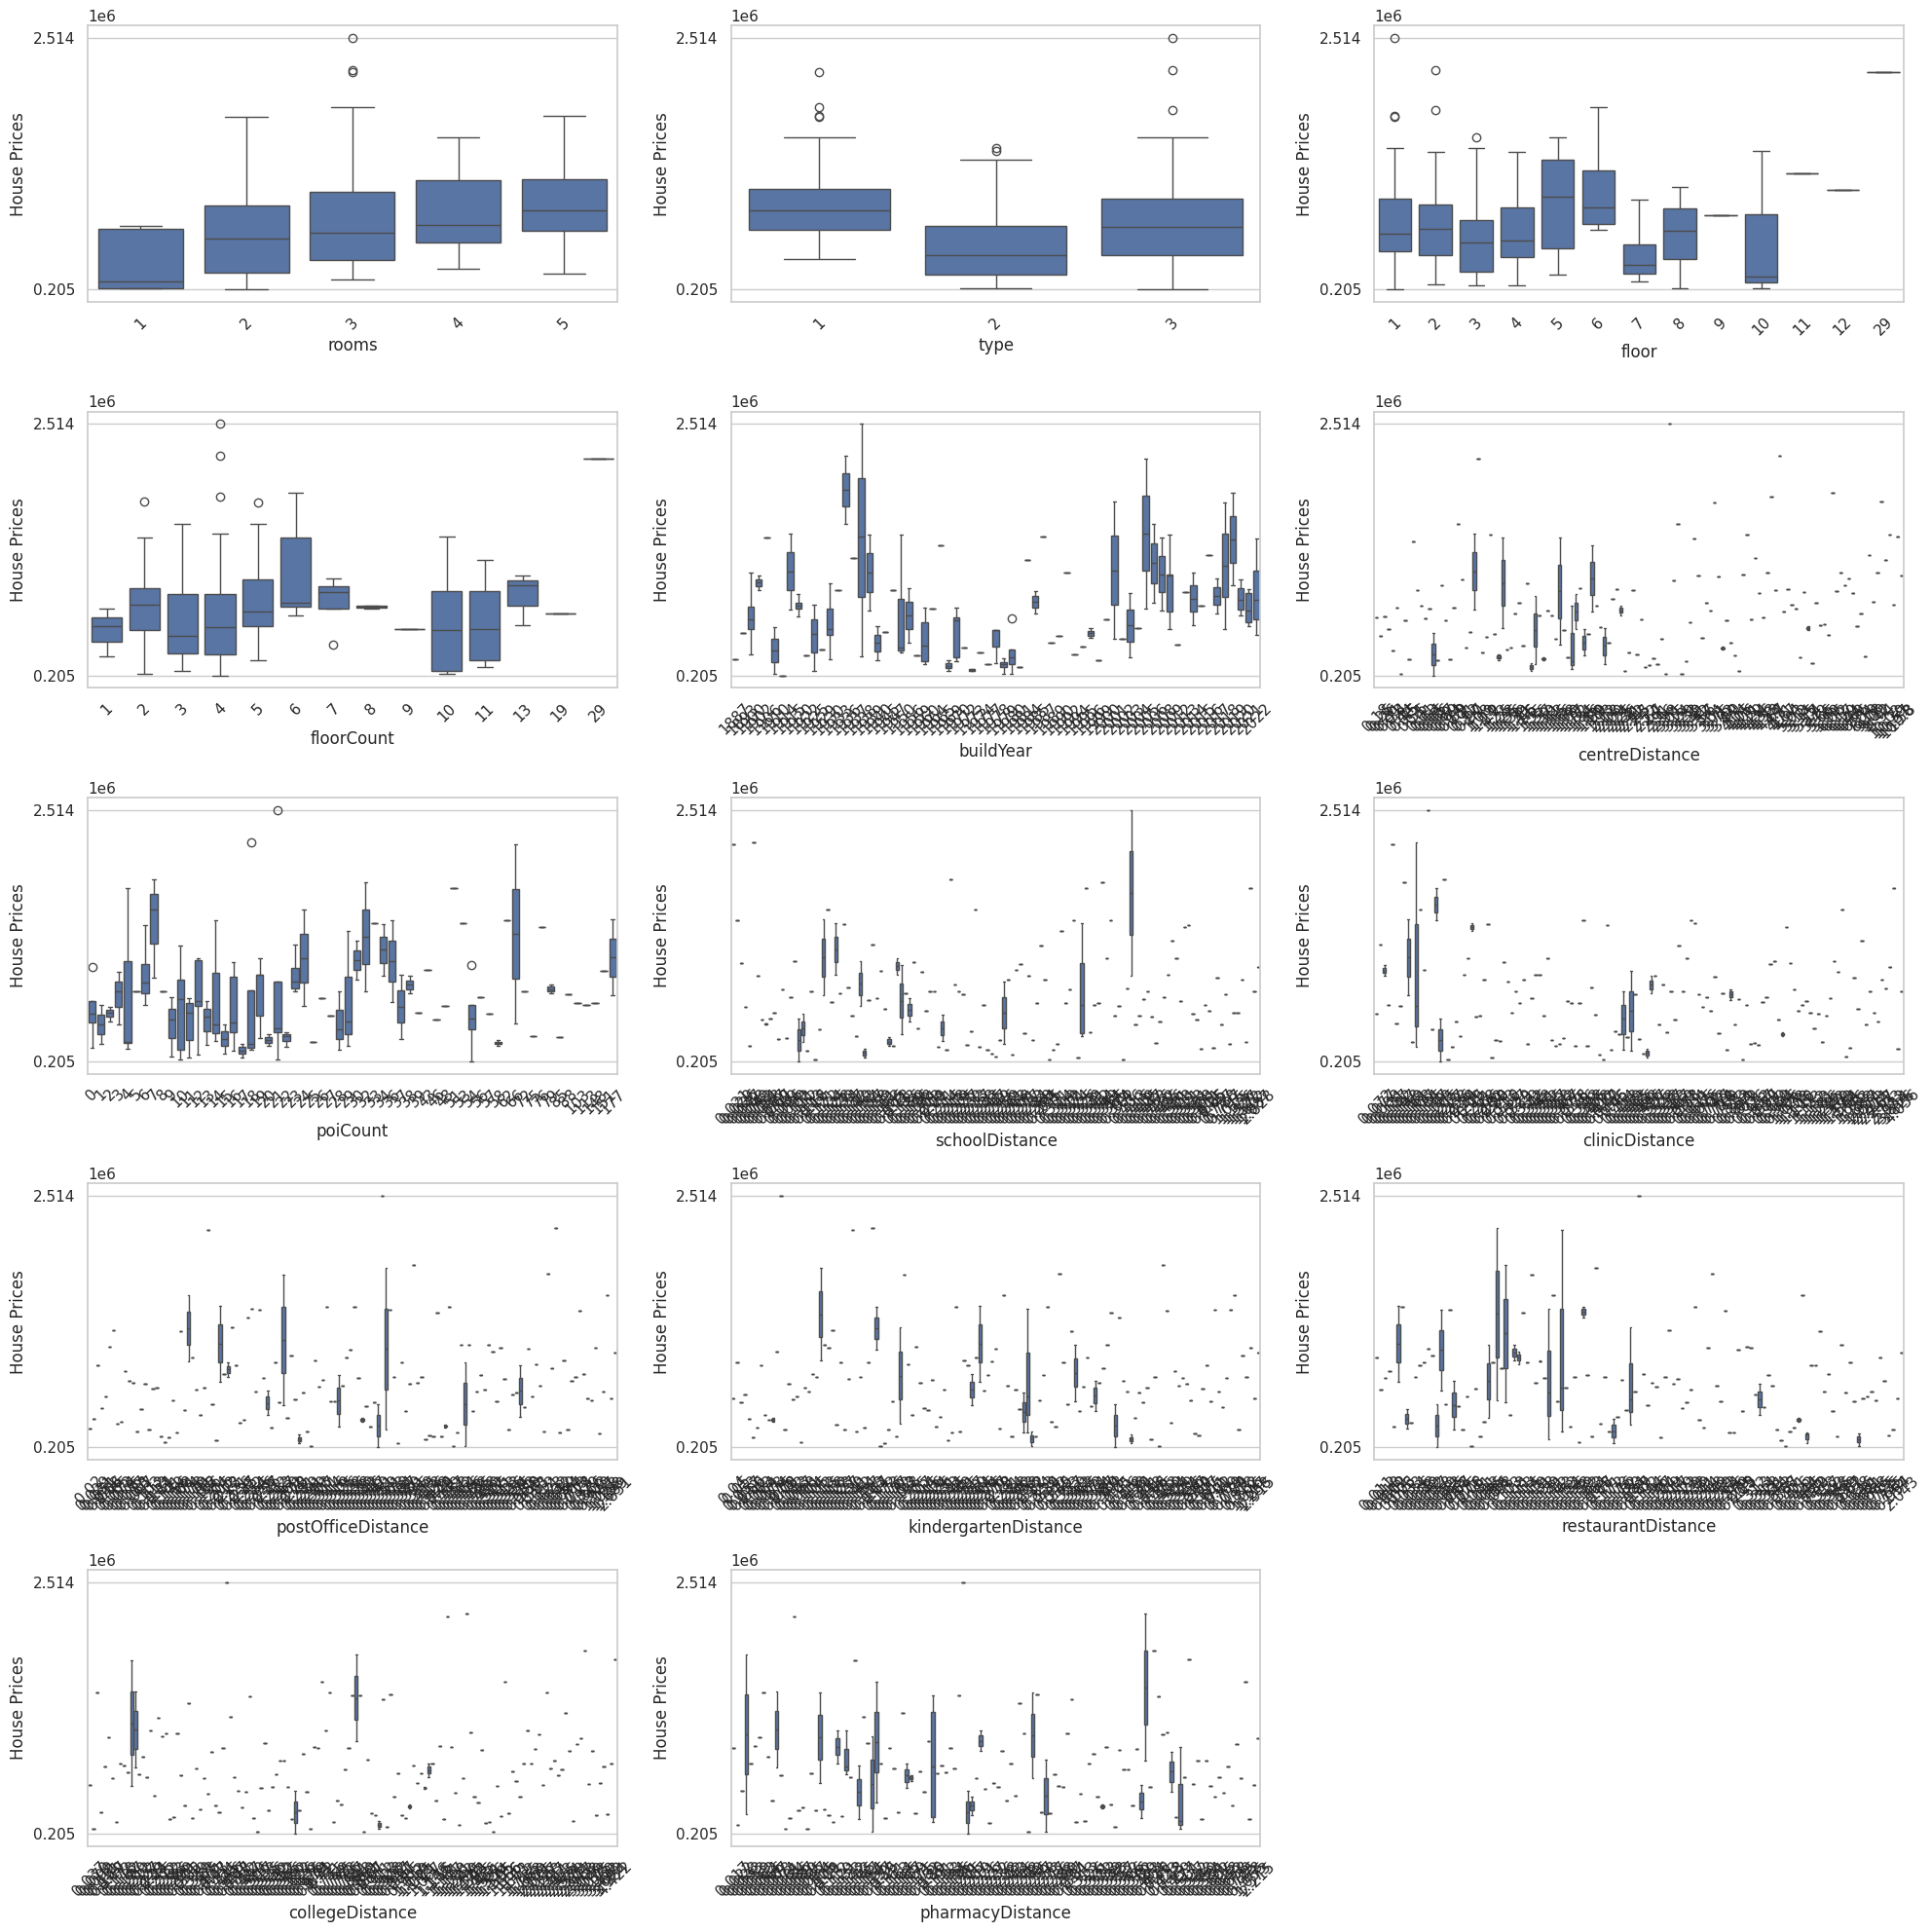

In [ ]:
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
attributes = ['rooms','type', 'floor', 'floorCount', 'buildYear', 'centreDistance', 'poiCount',
              'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
              'restaurantDistance', 'collegeDistance', 'pharmacyDistance']

for i, col in enumerate(attributes):
    plt.subplot(5, 3, i+1)  # Adjust the subplot dimensions as needed
    sns.boxplot(x=col, y='sorted_prices', data=house_info)
    plt.xlabel(col)
    plt.ylabel('House Prices')
    plt.xticks(rotation=45)  # Adjust the rotation of x-axis labels if needed
    min_price = house_info['sorted_prices'].min()
    max_price = house_info['sorted_prices'].max()
    # Set only min and max y ticks
    plt.yticks([min_price, max_price])
    #plt.yticks(ticks=[100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000])  # Adjust the ticks as needed
plt.tight_layout()
plt.show()

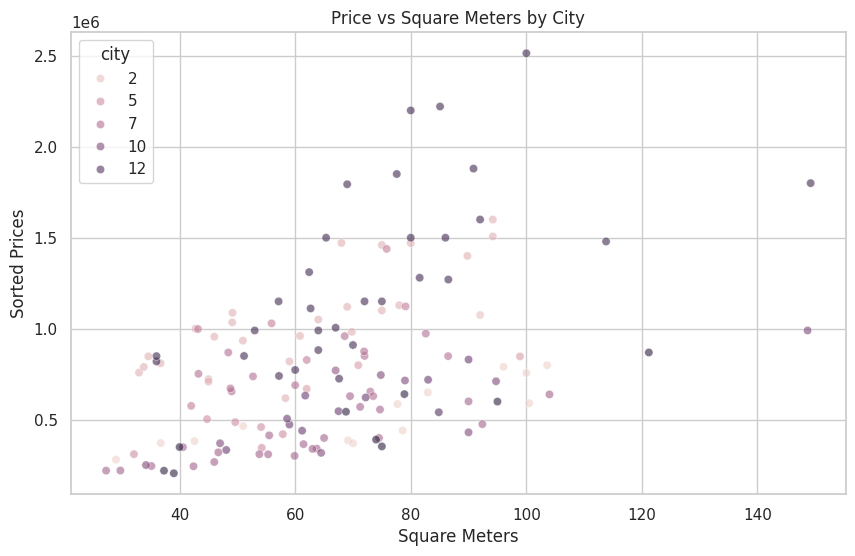

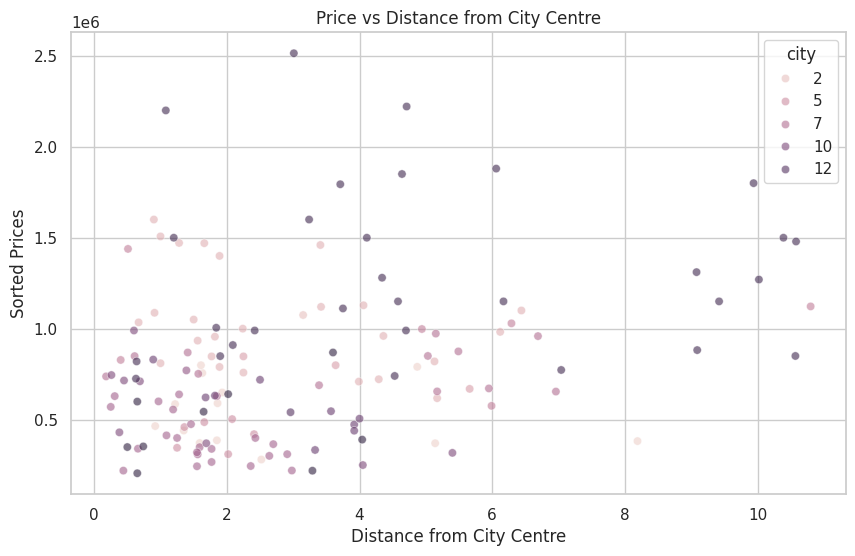

In [ ]:


# Scatter plot of price vs square meters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='squareMeters', y='sorted_prices', data=house_info, hue='city', alpha=0.6)
plt.xlabel('Square Meters')
plt.ylabel('Sorted Prices')
plt.title('Price vs Square Meters by City')
plt.show()

# Scatter plot of price vs centreDistance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='centreDistance', y='sorted_prices', data=house_info, hue='city', alpha=0.6)
plt.xlabel('Distance from City Centre')
plt.ylabel('Sorted Prices')
plt.title('Price vs Distance from City Centre')
plt.show()


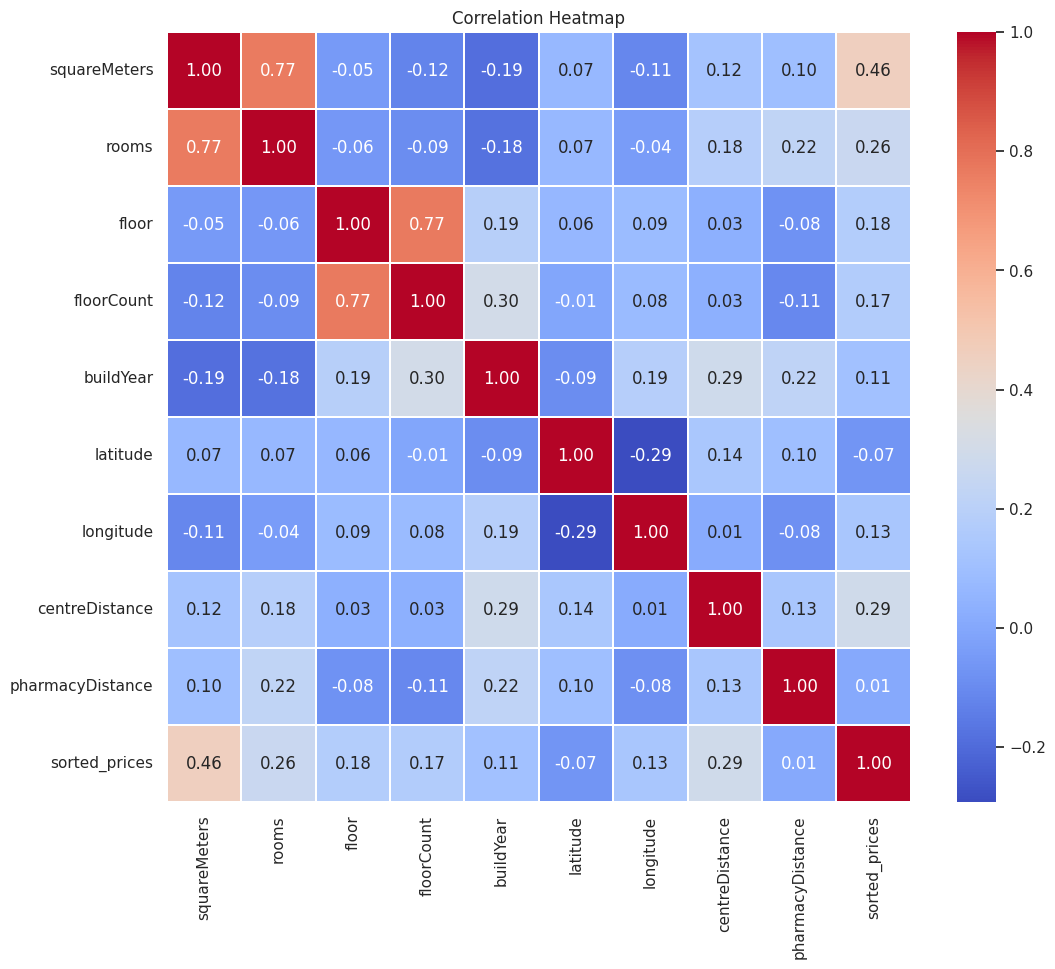

In [ ]:



# Convert sorted_prices from string to list and then calculate the average
def convert_prices(price_str):
    price_list = ast.literal_eval(price_str)
    if isinstance(price_list, list):
        return np.mean(price_list)
    else:
        return price_list

house_info['sorted_prices'] = house_info['sorted_prices'].apply(convert_prices)

# Correlation matrix calculation
numeric_cols = ['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
                'latitude', 'longitude', 'centreDistance', 'pharmacyDistance', 'sorted_prices']
correlation_matrix = house_info[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:


# Create a basic map centered around an average location
map = folium.Map(location=[house_info['latitude'].mean(), house_info['longitude'].mean()], zoom_start=10)

# Plot each house location as a circle marker
for idx, row in house_info.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        popup=f'Price: {row["sorted_prices"]}',
                        color='blue' if row['sorted_prices'] < 500000 else 'red',
                        fill=True).add_to(map)

# Display the map
map

In [ ]:


# Filter houses with build years after a certain threshold

filtered_houses = house_info[(house_info['buildYear'] >= 2010) & (house_info['sorted_prices'] > 500000)]

# Create a map centered around an average location
map = folium.Map(location=[house_info['latitude'].mean(), house_info['longitude'].mean()], zoom_start=10)

# Plot each filtered house location as a circle marker in red
for idx, row in filtered_houses.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        popup=f'Price: {row["sorted_prices"]}, Build Year: {row["buildYear"]}',
                        color='red',
                        fill=True).add_to(map)

# Filter houses with build years before the threshold or prices below $500,000
other_houses = house_info[~((house_info['buildYear'] >= 2010) & (house_info['sorted_prices'] > 500000))]

# Plot each other house location as a circle marker in blue
for idx, row in other_houses.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        popup=f'Price: {row["sorted_prices"]}, Build Year: {row["buildYear"]}',
                        color='blue',
                        fill=True).add_to(map)

# Display the map
map




In [ ]:


# Create a map centered around an average location
map = folium.Map(location=[house_info['latitude'].mean(), house_info['longitude'].mean()], zoom_start=10)

# Plot each house location based on its type
for idx, row in house_info.iterrows():
    if row['type'] == 1:
        color = 'blue'  # Type 1 houses
    elif row['type'] == 2:
        color = 'red'   # Type 2 houses
    else:
        color = 'green'  # Type 3 houses

    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        popup=f'Type: {row["type"]}, Price: {row["sorted_prices"]}',
                        color=color,
                        fill=True).add_to(map)

# Display the map
map


PCA

In [ ]:
numeric_columns = ['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
                     'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
                     'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
                     'collegeDistance', 'pharmacyDistance', 'ownership', 'buildingMaterial',
                     'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
                     'hasSecurity', 'hasStorageRoom']

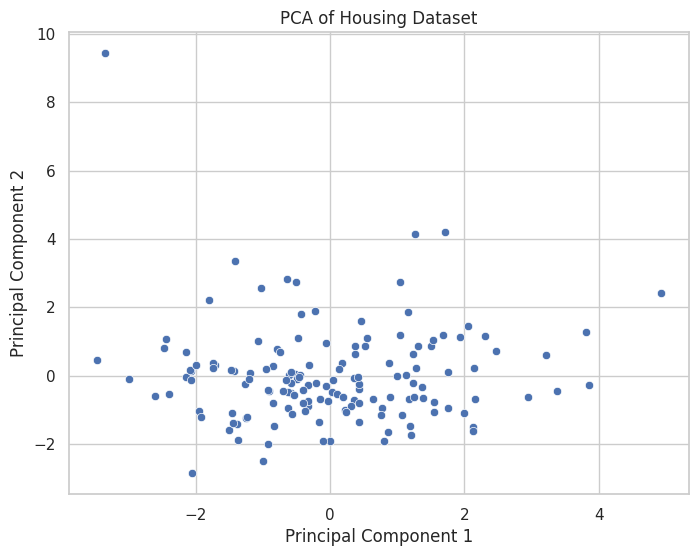

Explained variance ratio: [0.2217093  0.20626483]


In [ ]:



# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(house_info[numeric_cols])

# Apply PCA
pca = PCA(n_components=2)  # Using 2 components for visualization
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', data=principal_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Housing Dataset')
plt.show()

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)








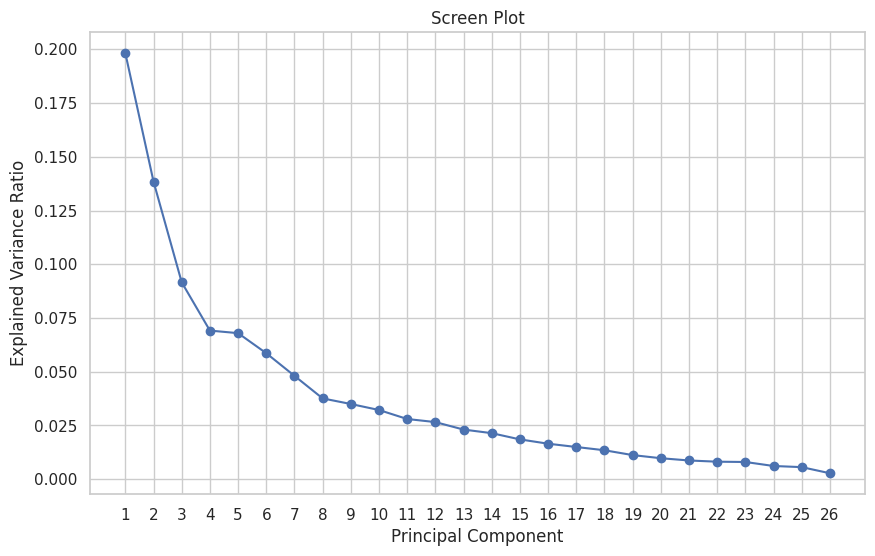

Explained variance ratio: [0.19816176 0.13846969 0.09160024 0.06914862 0.0679562  0.05862665
 0.0481003  0.03760128 0.0349967  0.03220481 0.02801789 0.02657923
 0.02310329 0.02143023 0.01853264 0.01652644 0.01499012 0.01348081
 0.01123119 0.00977692 0.00872206 0.00815659 0.00801789 0.00615895
 0.00562827 0.00278122]
Cumulative explained variance: [0.19816176 0.33663145 0.42823169 0.49738032 0.56533652 0.62396316
 0.67206346 0.70966475 0.74466145 0.77686627 0.80488416 0.83146338
 0.85456668 0.87599691 0.89452955 0.91105599 0.92604611 0.93952691
 0.95075811 0.96053502 0.96925708 0.97741367 0.98543156 0.99159051
 0.99721878 1.        ]


In [ ]:



# Selecting only the numerical columns
numerical_data = house_info[numeric_columns]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA()
pca.fit(scaled_data)

# Transforming the data into principal components
principal_components = pca.transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()



plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Explained variance ratio
print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)

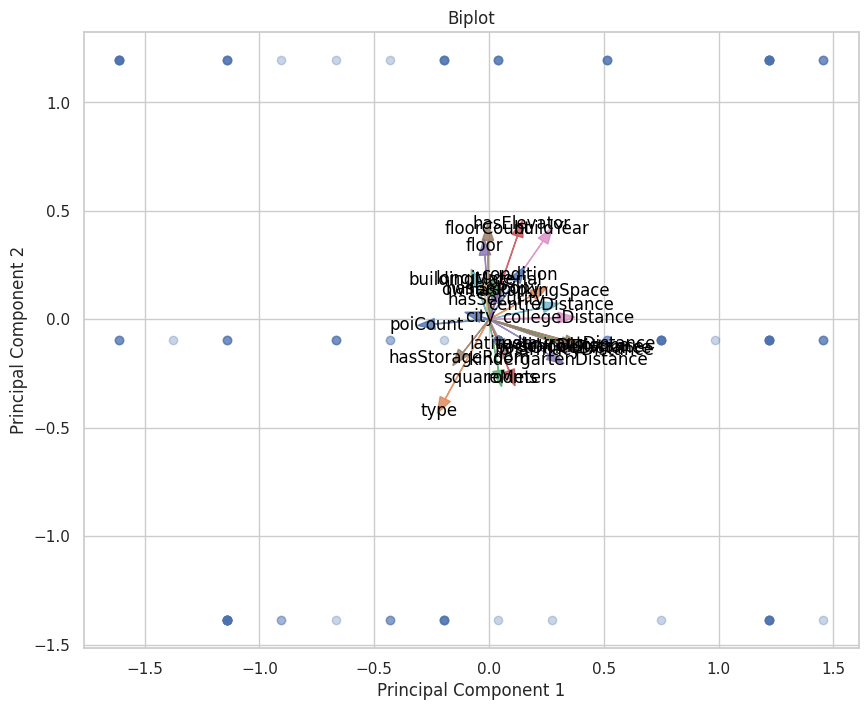

In [ ]:
pca = PCA()
numerical_data = house_info[numeric_columns]
scaled_data = scaler.fit_transform(numerical_data)
pca.fit(scaled_data)

# Biplot function
def biplot(pca, scaled_data, numerical_columns):
    # Plot principal components
    plt.figure(figsize=(10, 8))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.3)

    # Plot feature vectors as arrows
    for i, (component1, component2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        plt.arrow(0, 0, component1, component2, color=f'C{i}', alpha=0.8, head_width=0.05)
        plt.text(component1 * 1.15, component2 * 1.15, numerical_columns[i], color='black', ha='center', va='center')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Biplot')
    plt.grid(True)
    plt.show()

# Call biplot function
biplot(pca, scaled_data, numeric_columns)

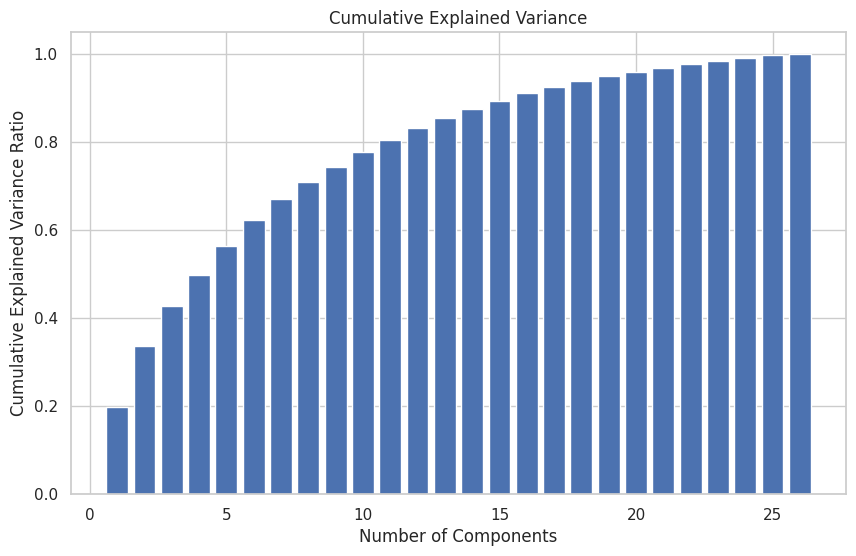

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

PCA including the price (achieved by seperating the prices into different columns)

In [ ]:
numer_columns = ['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
                     'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
                     'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
                     'collegeDistance', 'pharmacyDistance', 'ownership', 'buildingMaterial',
                     'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
                     'hasSecurity', 'hasStorageRoom','price_1', 'price_2', 'price_3',
                  'price_4', 'price_5', 'price_6', 'price_7']

In [ ]:
first_scaler = StandardScaler()
first_scaled_data = first_scaler.fit_transform(housing_info[numer_columns])

# Apply PCA
pcas = PCA()
pcas.fit(first_scaled_data)

# Display the principal components
components_df = pd.DataFrame(pcas.components_, columns=housing_info.columns)
print("Principal Components:")
components_df

Principal Components:


city      type  squareMeters     rooms     floor  floorCount  \
0   0.057149 -0.081025      0.161781  0.101841  0.071505    0.074667   
1  -0.060069 -0.155449     -0.015489  0.057992 -0.058773   -0.049103   
2  -0.012448 -0.371888     -0.298909 -0.270945  0.278157    0.347592   
3   0.327476  0.102280      0.175923  0.265887  0.201484    0.152742   
4  -0.067647  0.135863     -0.050673  0.040292  0.354904    0.324307   
5  -0.214748  0.154180      0.002656 -0.084602  0.223062    0.174017   
6   0.464673  0.174427     -0.379118 -0.379062 -0.088988   -0.152666   
7   0.295276 -0.007310      0.219246  0.219920  0.127909    0.113235   
8  -0.250460  0.158449     -0.119462 -0.102173 -0.011906   -0.042264   
9   0.088818 -0.025569     -0.094771 -0.073274 -0.163679   -0.143253   
10  0.257836 -0.142641      0.198775  0.238034  0.227388    0.121136   
11  0.111910 -0.174893      0.037369 -0.074605  0.060277    0.041201   
12 -0.092794 -0.080935     -0.141465 -0.162758  0.192655    0.173821   
13 -0.114992 -0.154126      0.020895  0.258674 -0.252756   -0.164772   
14 -0.148415  0.238343     -0.066312  0.167651  0.035317    0.087381   
15  0.236697  0.257972     -0.088138 -0.218116  0.109357    0.065813   
16  0.260200  0.061015     -0.014479  0.149333 -0.277626    0.212871   
17 -0.112283  0.120573      0.088946 -0.072968  0.179526    0.045318   
18 -0.070887 -0.091114      0.069252 -0.085238 -0.065741   -0.047001   
19 -0.176291 -0.191625     -0.135798  0.015917  0.010498    0.106893   
20 -0.208171  0.089963     -0.016610  0.058885  0.008778    0.128952   
21 -0.286271  0.180390     -0.075211  0.180899  0.068606   -0.104420   
22 -0.118995 -0.013558     -0.084403  0.125600 -0.342737    0.335913   
23  0.098664  0.030190      0.084726 -0.158478 -0.315965    0.289391   
24 -0.037653 -0.040524      0.004971 -0.040112 -0.367078    0.520949   
25 -0.122886  0.158808      0.699064 -0.511059 -0.063862    0.029180   
26  0.014845  0.620564     -0.147438  0.138366 -0.044057    0.103149   
27  0.006842  0.000184      0.002298  0.003938  0.012797    0.009554   
28  0.003406 -0.017129      0.006674 -0.003422  0.012637   -0.009191   
29 -0.005144  0.001189      0.000406  0.003392 -0.000379    0.001545   
30  0.000595 -0.009840     -0.004837  0.002119  0.008241   -0.008578   
31 -0.000711 -0.008776     -0.001953  0.001347  0.003322   -0.003708   
32  0.000212 -0.001374      0.004265  0.000474  0.000916   -0.002066   

    buildYear  latitude  longitude  centreDistance  ...  hasElevator  \
0    0.086439 -0.020966   0.042331        0.129898  ...     0.147087   
1    0.201198  0.060894  -0.079531        0.196158  ...     0.057875   
2    0.369470 -0.085597   0.146130        0.048409  ...     0.359381   
3   -0.075131  0.133295   0.174666        0.235539  ...    -0.070018   
4   -0.157531  0.089185  -0.024173       -0.304942  ...     0.115211   
5   -0.121535  0.439428  -0.590039        0.184829  ...     0.104947   
6   -0.129019  0.136572   0.285084        0.157304  ...     0.056406   
7    0.057678  0.243576   0.063345       -0.010883  ...    -0.064115   
8   -0.110075 -0.270442  -0.015065        0.038186  ...     0.040521   
9    0.044970  0.600862  -0.029917        0.025485  ...     0.059439   
10   0.031379 -0.206203   0.023395        0.012661  ...    -0.073462   
11   0.174667  0.284591   0.072703       -0.183113  ...     0.019064   
12  -0.076647 -0.024006  -0.069377       -0.061151  ...    -0.234854   
13   0.103152  0.108707  -0.089752       -0.084757  ...     0.004554   
14  -0.203754 -0.021206   0.195474        0.498410  ...     0.120101   
15  -0.182123 -0.137407  -0.197453       -0.029045  ...    -0.154736   
16  -0.111233 -0.173898  -0.278344       -0.042052  ...     0.591898   
17   0.038066  0.133705   0.284522       -0.175508  ...    -0.062178   
18   0.031238 -0.007130  -0.028662       -0.166446  ...     0.021638   
19   0.159495  0.036443  -0.002716        0.467550  ...    -0.286272   
20  -0.196704  0.091810   0.232589       -0.264

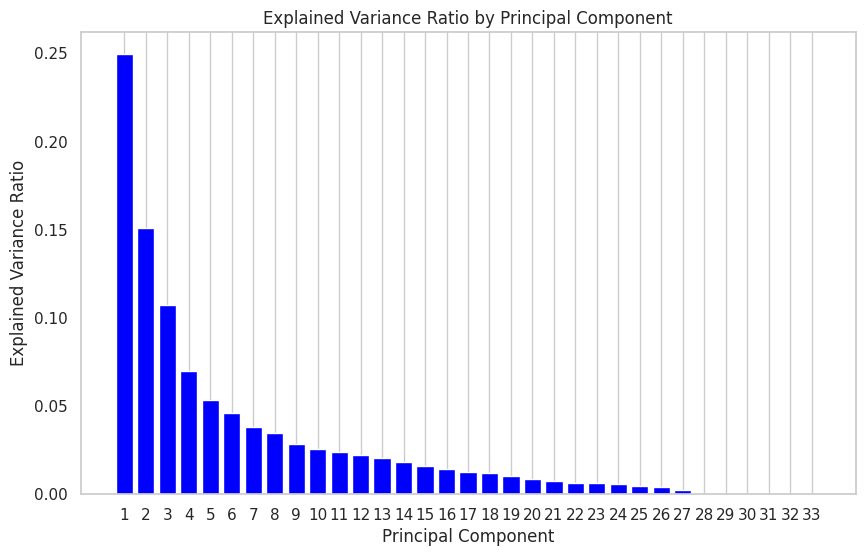

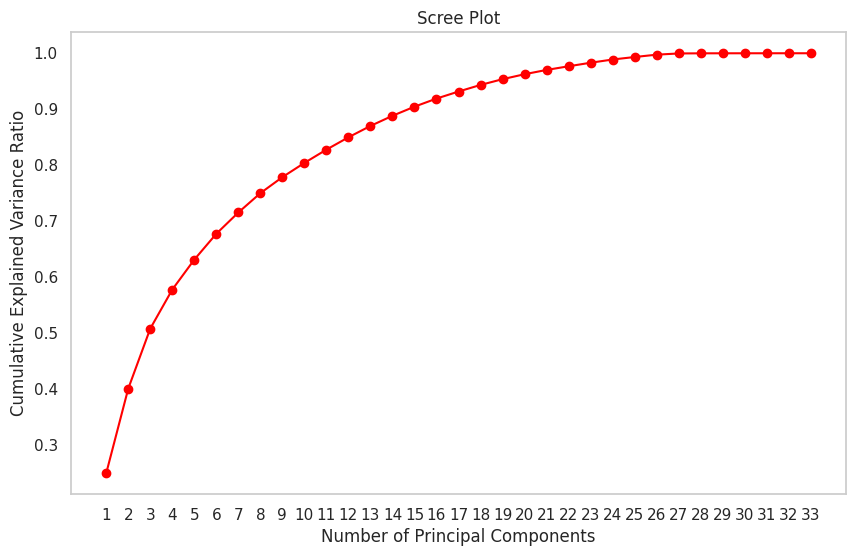

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pcas.explained_variance_ratio_) + 1), pcas.explained_variance_ratio_, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(pcas.explained_variance_ratio_) + 1))
plt.grid(axis='y')
plt.show()

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pcas.explained_variance_ratio_) + 1), np.cumsum(pcas.explained_variance_ratio_), marker='o', color='red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(pcas.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

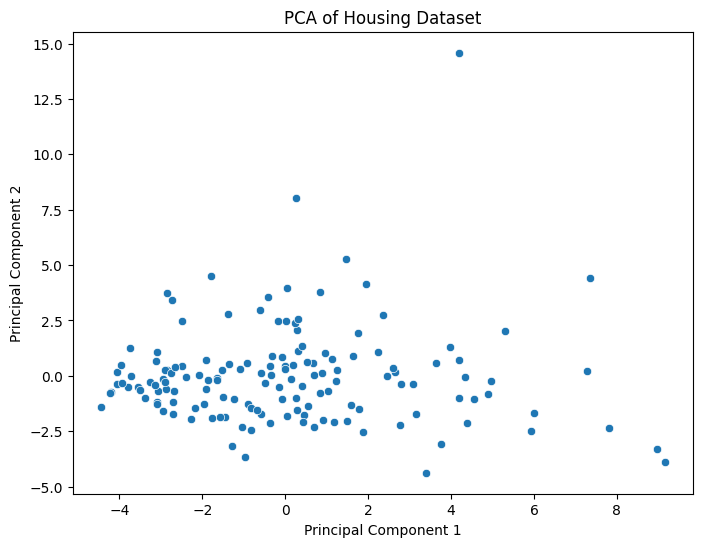

Explained variance ratio: [0.24946668 0.15116165 0.10726415]


In [ ]:
next_scaler = StandardScaler()
next_scaled_features = next_scaler.fit_transform(housing_info[numer_columns])

# Apply PCA
two_pca = PCA(n_components=3)  # Using 2 components for visualization
new_principal_components = two_pca.fit_transform(next_scaled_features)
new_principal_df = pd.DataFrame(data=new_principal_components, columns=['principal component 1', 'principal component 2','principal component 3'])

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', data=new_principal_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Housing Dataset')
plt.show()

# Explained variance ratio
print("Explained variance ratio:", two_pca.explained_variance_ratio_)

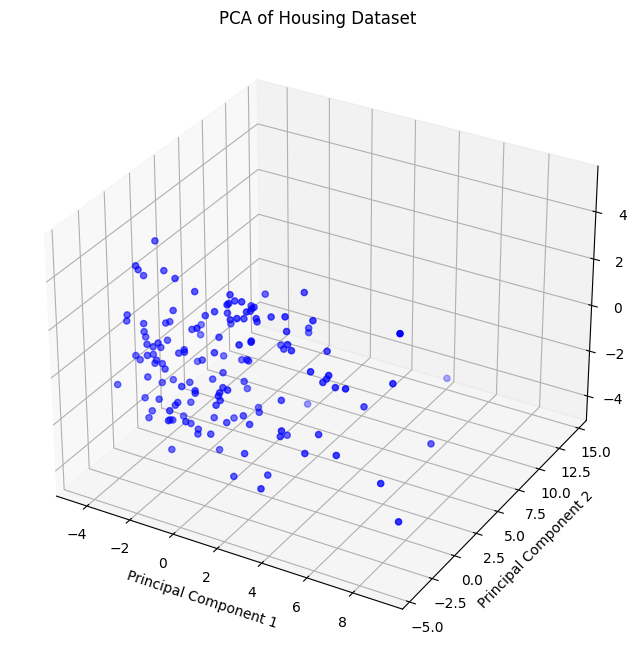

Explained variance ratio: [0.24946668 0.15116165 0.10726415]


In [ ]:
next_scaler = StandardScaler()
next_scaled_features = next_scaler.fit_transform(housing_info[numer_columns])

# Apply PCA
three_pca = PCA(n_components=3)  # Using 3 components
new_principal_components = three_pca.fit_transform(next_scaled_features)
new_principal_df = pd.DataFrame(data=new_principal_components, columns=['principal component 1', 'principal component 2','principal component 3'])



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_principal_df['principal component 1'], new_principal_df['principal component 2'], new_principal_df['principal component 3'], c='b', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Housing Dataset')
plt.show()

# Explained variance ratio
print("Explained variance ratio:", three_pca.explained_variance_ratio_)


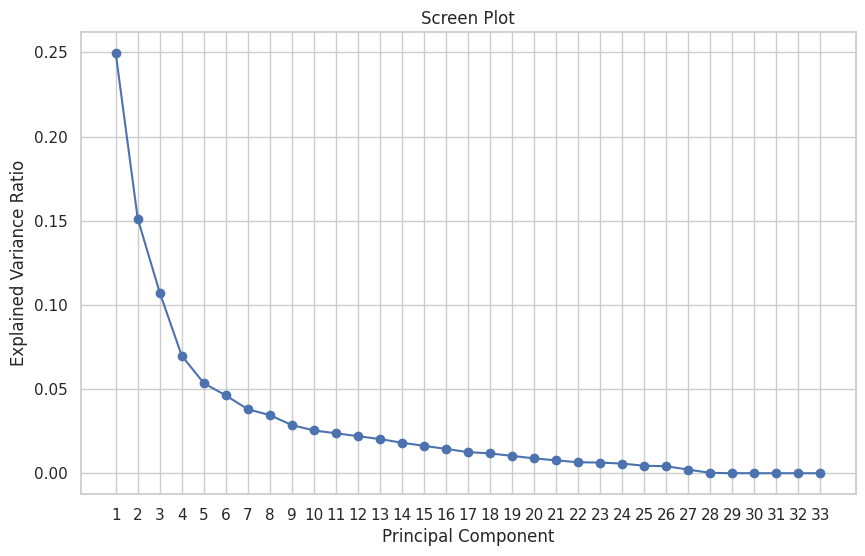

Explained variance ratio: [2.49466677e-01 1.51161648e-01 1.07264153e-01 6.97702376e-02
 5.35454175e-02 4.61933959e-02 3.80317099e-02 3.45135434e-02
 2.86420990e-02 2.54190301e-02 2.37559559e-02 2.20233813e-02
 2.03080829e-02 1.81303771e-02 1.62975128e-02 1.44682594e-02
 1.25749675e-02 1.17913090e-02 1.03100663e-02 8.85020632e-03
 7.66218583e-03 6.54788971e-03 6.32159861e-03 5.76531457e-03
 4.45754548e-03 4.18479261e-03 2.16637068e-03 2.47957899e-04
 5.38965373e-05 3.41156358e-05 2.37985828e-05 1.15224678e-05
 4.98207545e-06]
Cumulative explained variance: [0.24946668 0.40062832 0.50789248 0.57766271 0.63120813 0.67740153
 0.71543324 0.74994678 0.77858888 0.80400791 0.82776387 0.84978725
 0.87009533 0.88822571 0.90452322 0.91899148 0.93156645 0.94335776
 0.95366782 0.96251803 0.97018022 0.9767281  0.9830497  0.98881502
 0.99327256 0.99745736 0.99962373 0.99987168 0.99992558 0.9999597
 0.9999835  0.99999502 1.        ]


In [ ]:
# Selecting only the numerical columns

# Standardizing the data
scaler = StandardScaler()
third_scaled_data = scaler.fit_transform(housing_info[numer_columns])

# Applying PCA
pcass = PCA()
pcass.fit(third_scaled_data)

# Transforming the data into principal components
principal_components = pcass.transform(third_scaled_data)

# Explained variance ratio
explained_variance_ratio = pcass.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()



plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Explained variance ratio
print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)

Principal Component 1: 0.06, -0.06, Corresponding Column: city
Principal Component 2: -0.08, -0.16, Corresponding Column: type
Principal Component 3: 0.16, -0.02, Corresponding Column: squareMeters
Principal Component 4: 0.10, 0.06, Corresponding Column: rooms
Principal Component 5: 0.07, -0.06, Corresponding Column: floor
Principal Component 6: 0.07, -0.05, Corresponding Column: floorCount
Principal Component 7: 0.09, 0.20, Corresponding Column: buildYear
Principal Component 8: -0.02, 0.06, Corresponding Column: latitude
Principal Component 9: 0.04, -0.08, Corresponding Column: longitude
Principal Component 10: 0.13, 0.20, Corresponding Column: centreDistance
Principal Component 11: 0.02, -0.26, Corresponding Column: poiCount
Principal Component 12: 0.05, 0.35, Corresponding Column: schoolDistance
Principal Component 13: 0.03, 0.33, Corresponding Column: clinicDistance
Principal Component 14: 0.06, 0.32, Corresponding Column: postOfficeDistance
Principal Component 15: 0.05, 0.27, Corr

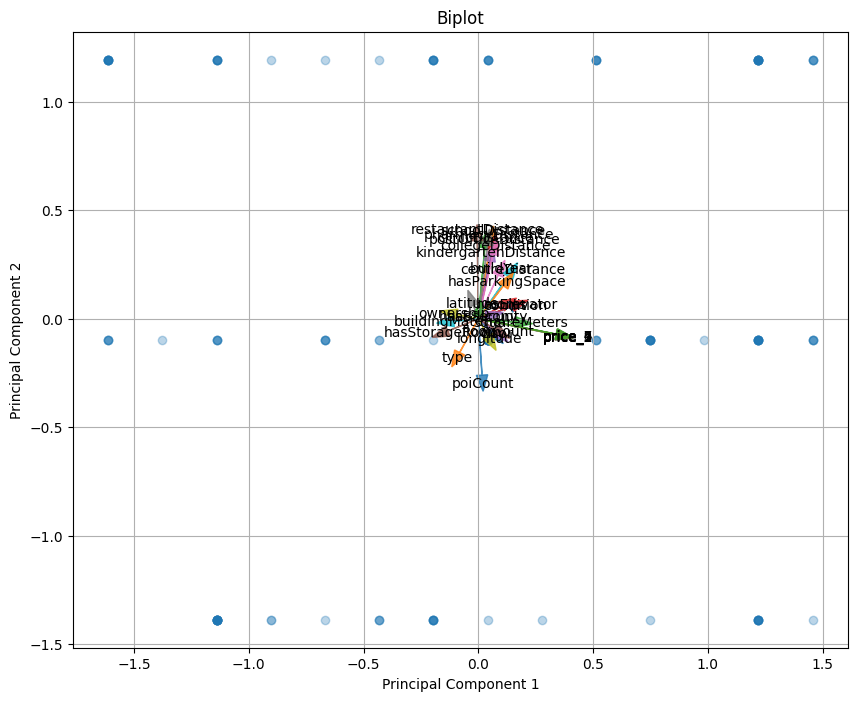

In [ ]:
pcass = PCA()
scaler = StandardScaler()
third_scaled_data = scaler.fit_transform(housing_info[numer_columns])
pcass.fit(third_scaled_data)

# Biplot function
def biplot(pca, scaled_data, numer_columns):
    # Plot principal components
    plt.figure(figsize=(10, 8))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.3)

    # Plot feature vectors as arrows
    for i, (component1, component2) in enumerate(zip(pcass.components_[0], pcass.components_[1])):
        plt.arrow(0, 0, component1, component2, color=f'C{i}', alpha=0.8, head_width=0.05)
        plt.text(component1 * 1.15, component2 * 1.15, numer_columns[i], color='black', ha='center', va='center')
        print(f"Principal Component {i+1}: {component1:.2f}, {component2:.2f}, Corresponding Column: {numer_columns[i]}")

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Biplot')
    plt.grid(True)
    plt.show()

# Call biplot function
biplot(pcass, third_scaled_data, numer_columns)

Second Dataset, did PCA for one month

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/CSDS312Project/apartments_pl_2024_02.csv")

df = df.dropna()

df['condition'] = df['condition'].map({'low': 0, 'premium': 1})
df['type'] = df['type'].map({'apartmentBuilding': 1, 'blockOfFlats': 2, 'tenement': 3})
for col in ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']:
    df[col] = df[col].map({'no': 0, 'yes': 1})

df['city'] = df['city'].map({'szczecin':1,
                                'gdynia':2,
                                'krakow':3,
                                'poznan':4,
                                'bialystok':5,
                                'gdansk':6,
                                'wroclaw':7,
                                'radom':8,
                                'rzeszow':9,
                                'katowice':10,
                                'lublin':11,
                                'czestochowa':12,
                                'warszawa':13,
                                'bydgoszcz':14
                                })
df['ownership'] = df['ownership'].map({'condominium': 0, 'cooperative': 1})
df['buildingMaterial'] = df['buildingMaterial'].map({'brick': 0, 'concreteSlab': 1})

df.drop(columns=['id'], inplace=True)
df.dropna(inplace = True)

In [ ]:
df

In [ ]:
num_col = ['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
                     'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
                     'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
                     'collegeDistance', 'pharmacyDistance', 'ownership', 'buildingMaterial',
                     'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
                     'hasSecurity', 'hasStorageRoom','price']

In [ ]:
scalllerr = StandardScaler()
dataaa = scalllerr.fit_transform(df[num_col])

# Apply PCA
pcas = PCA()
pcas.fit(dataaa)

# Display the principal components
components_df = pd.DataFrame(pcas.components_, columns=df.columns)
print("Principal Components:")
components_df

Principal Components:


city      type  squareMeters     rooms     floor  floorCount  \
0  -0.013766 -0.265378     -0.000717  0.003749 -0.013413   -0.009690   
1  -0.209181  0.316701      0.051116  0.043231 -0.258571   -0.343784   
2  -0.002043 -0.001748      0.475935  0.394895 -0.189693   -0.227551   
3   0.324725  0.137095      0.295810  0.369353  0.104002    0.101755   
4  -0.302702  0.034638      0.205576  0.222942  0.425116    0.386325   
5   0.325057  0.126165     -0.156456 -0.185564  0.040874    0.018565   
6   0.377952  0.131709     -0.047727 -0.083787  0.068760    0.082128   
7  -0.024416 -0.012264     -0.056714 -0.049950  0.063699    0.018244   
8  -0.189231  0.162272      0.031738  0.025384  0.272440    0.128579   
9  -0.074386 -0.055093      0.028240  0.051040 -0.149877   -0.116419   
10 -0.043543  0.070909     -0.045045 -0.071375  0.046614   -0.037096   
11 -0.100373 -0.074832     -0.025118 -0.022526 -0.222539   -0.132165   
12  0.006473  0.084165     -0.074199 -0.112800 -0.017566   -0.001236   
13 -0.053860  0.257311     -0.012707 -0.085768  0.450348   -0.013202   
14 -0.183027 -0.045363     -0.047528 -0.191795  0.002710    0.022172   
15  0.057530 -0.172428      0.035542 -0.086501  0.147054    0.020311   
16  0.042761 -0.402637      0.051287  0.082027  0.290904   -0.069603   
17 -0.030642 -0.017502      0.029007 -0.065806 -0.109311    0.091368   
18  0.071382  0.077366      0.021655  0.132017 -0.100712    0.057815   
19  0.163694  0.087601      0.044200  0.090244 -0.038598    0.018859   
20  0.085750 -0.017858      0.031019 -0.093494  0.015680   -0.013005   
21 -0.152513  0.035585     -0.072567 -0.344333  0.194544   -0.323770   
22  0.030488  0.039210     -0.020178  0.077201 -0.057206    0.135350   
23  0.307932 -0.089630      0.052763 -0.253486 -0.279845    0.503533   
24 -0.502379  0.042900     -0.061857  0.005858 -0.305356    0.464681   
25 -0.030474  0.179567      0.732300 -0.541364 -0.018386    0.014231   
26 -0.049680 -0.639891      0.205130 -0.107889  0.019465   -0.054984   

    buildYear  latitude  longitude  centreDistance  ...  pharmacyDistance  \
0    0.295063 -0.007762   0.003182        0.254139  ...          0.308410   
1   -0.293217  0.090890  -0.252545       -0.096096  ...          0.195909   
2   -0.012990  0.001333   0.025637       -0.014465  ...         -0.029764   
3   -0.109504  0.060116   0.279862        0.210787  ...          0.054571   
4   -0.055687  0.084497  -0.303211       -0.292956  ...          0.134338   
5   -0.146219 -0.275901   0.483825       -0.180719  ...          0.264334   
6   -0.116095  0.698184  -0.057281        0.197861  ...         -0.015479   
7   -0.000416  0.144996  -0.115929       -0.045113  ...          0.071574   
8   -0.183748 -0.406843   0.034244        0.255488  ...         -0.141648   
9    0.045607 -0.238309   0.042796        0.064450  ...          0.011608   
10  -0.056032  0.015464  -0.038915        0.060712  ...         -0.029918   
11   0.065379  0.024701   0.000838       -0.025211  ...         -0.023589   
12  -0.066112 -0.028978   0.031829       -0.007004  ...         -0.019960   
13  -0.188663 -0.017157   0.097981        0.101181  ...          0.029008   
14   0.020875  0.031252   0.075100        0.198686  ...          0.066332   
15   0.121896  0.001827  -0.138371       -0.199862  ...         -0.162858   
16   0.368741  0.079597   0.161210       -0.091388  ...          0.103203   
17  -0.016242  0.084816  -0.067093        0.159196  ...          0.181763   
18  -0.028799 -0.010111   0.055584       -0.421692  ...          0.178067   
19  -0.005182  0.001179   0.139970       -0.289353  ...         -0.319468   
20  -0.005580  0.038868   0.067041       -0.475793  ...          0.122308   
21  -0.039984  0.142029   0.025342       -0.171530  ...          0.080121   
22  -0.027323 -0.070710  -0.079265        0.054023  ...          0.711556   
23  -0.099787 -0.217309  -0.374339       -0.031254  ...         -0.073246   
24   0.005548  0.284140   0.499047       -0.051471  ...         -0

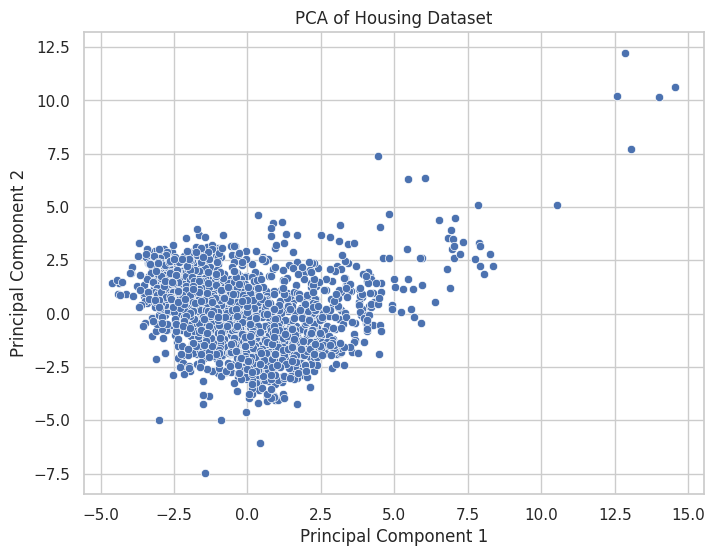

Explained variance ratio: [0.19080624 0.12156628]


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_col])

# Apply PCA
pca = PCA(n_components=2)  # Using 2 components for visualization
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', data=principal_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Housing Dataset')
plt.show()

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

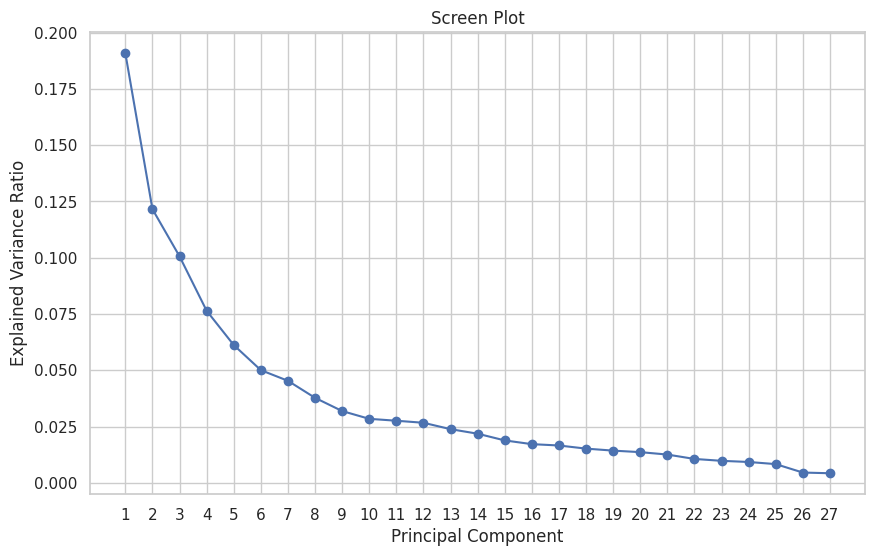

Explained variance ratio: [0.19080624 0.12156628 0.10061542 0.07644388 0.06122621 0.05008568
 0.04535077 0.03779479 0.03191979 0.02846577 0.02761924 0.02671671
 0.02387537 0.02186392 0.01888297 0.01722355 0.01662759 0.01523966
 0.01434827 0.01367376 0.01260332 0.01065373 0.00981941 0.00930553
 0.00836125 0.00461123 0.00429968]
Cumulative explained variance: [0.19080624 0.31237251 0.41298793 0.48943181 0.55065802 0.6007437
 0.64609446 0.68388925 0.71580905 0.74427482 0.77189405 0.79861076
 0.82248613 0.84435005 0.86323301 0.88045657 0.89708416 0.91232382
 0.92667209 0.94034585 0.95294917 0.9636029  0.97342231 0.98272784
 0.9910891  0.99570032 1.        ]


In [ ]:
one_numerical_data = df[num_col]

# Standardizing the data
scaler = StandardScaler()
one_scaled_data = scaler.fit_transform(one_numerical_data)

# Applying PCA
pca = PCA()
pca.fit(one_scaled_data)

# Transforming the data into principal components
principal_components = pca.transform(one_scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()



plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Explained variance ratio
print("Explained variance ratio:",explained_variance_ratio )
print("Cumulative explained variance:", cumulative_explained_variance)

In [ ]:
explained_variance_df = pd.DataFrame({'Attribute': num_col, 'Explained Variance Ratio': explained_variance_ratio})
explained_variance_df


Attribute  Explained Variance Ratio
0                   city                  0.190806
1                   type                  0.121566
2           squareMeters                  0.100615
3                  rooms                  0.076444
4                  floor                  0.061226
5             floorCount                  0.050086
6              buildYear                  0.045351
7               latitude                  0.037795
8              longitude                  0.031920
9         centreDistance                  0.028466
10              poiCount                  0.027619
11        schoolDistance                  0.026717
12        clinicDistance                  0.023875
13    postOfficeDistance                  0.021864
14  kindergartenDistance                  0.018883
15    restaurantDistance                  0.017224
16       collegeDistance                  0.016628
17      pharmacyDistance                  0.015240
18             ownership                  0.014348
19      buildingMaterial                  0.013674
20             condition                  0.012603
21       hasParkingSpace                  0.010654
22            hasBalcony                  0.009819
23           hasElevator                  0.009306
24           hasSecurity                  0.008361
25        hasStorageRoom                  0.004611
26                 price                  0.004300

Principal Component 1: -0.01, -0.21, Corresponding Column: city
Principal Component 2: -0.27, 0.32, Corresponding Column: type
Principal Component 3: -0.00, 0.05, Corresponding Column: squareMeters
Principal Component 4: 0.00, 0.04, Corresponding Column: rooms
Principal Component 5: -0.01, -0.26, Corresponding Column: floor
Principal Component 6: -0.01, -0.34, Corresponding Column: floorCount
Principal Component 7: 0.30, -0.29, Corresponding Column: buildYear
Principal Component 8: -0.01, 0.09, Corresponding Column: latitude
Principal Component 9: 0.00, -0.25, Corresponding Column: longitude
Principal Component 10: 0.25, -0.10, Corresponding Column: centreDistance
Principal Component 11: -0.26, -0.02, Corresponding Column: poiCount
Principal Component 12: 0.33, 0.16, Corresponding Column: schoolDistance
Principal Component 13: 0.29, 0.15, Corresponding Column: clinicDistance
Principal Component 14: 0.31, 0.15, Corresponding Column: postOfficeDistance
Principal Component 15: 0.23, 0.24,

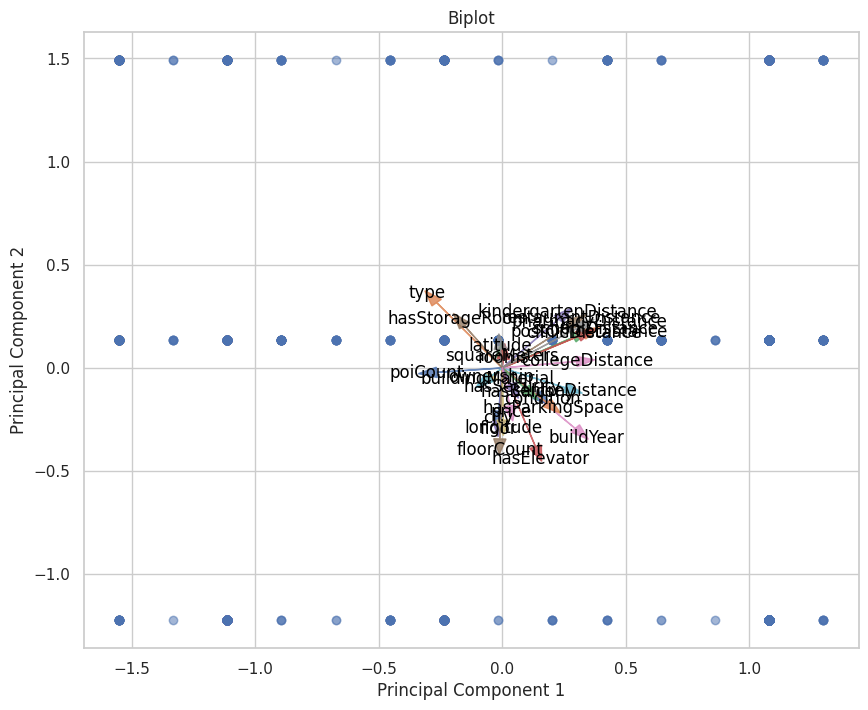

In [ ]:
year_numerical_data = df[num_col]

# Standardizing the data
year_scaler = StandardScaler()
one_scaled_data = year_scaler.fit_transform(year_numerical_data)

pcasss = PCA()
pcasss.fit(one_scaled_data)

# Biplot function
def biplot(pca, scaled_data, numer_columns):
    # Plot principal components
    plt.figure(figsize=(10, 8))
    plt.scatter(scaled_data[:, 0], one_scaled_data[:, 1], alpha=0.3)

    # Plot feature vectors as arrows
    for i, (component1, component2) in enumerate(zip(pcasss.components_[0], pcasss.components_[1])):
        plt.arrow(0, 0, component1, component2, color=f'C{i}', alpha=0.8, head_width=0.05)
        plt.text(component1 * 1.15, component2 * 1.15, num_col[i], color='black', ha='center', va='center')
        print(f"Principal Component {i+1}: {component1:.2f}, {component2:.2f}, Corresponding Column: {num_col[i]}")


    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Biplot')
    plt.grid(True)
    plt.show()

# Call biplot function
biplot(pcasss, one_scaled_data, num_col)




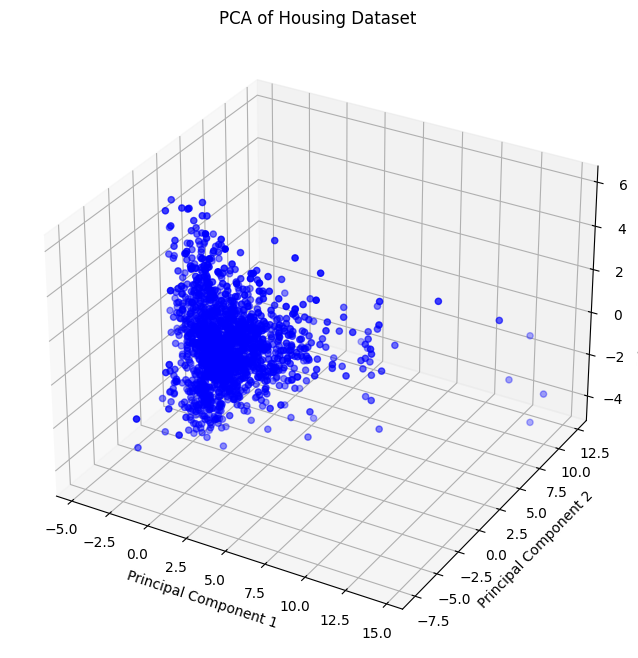

Explained variance ratio: [0.19080624 0.12156627 0.10061534]


In [ ]:
next_scaler = StandardScaler()
next_scaled_features = next_scaler.fit_transform(df[num_col])

# Apply PCA
three_pca = PCA(n_components=3)  # Using 3 components
new_principal_components = three_pca.fit_transform(next_scaled_features)
new_principal_df = pd.DataFrame(data=new_principal_components, columns=['principal component 1', 'principal component 2','principal component 3'])



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_principal_df['principal component 1'], new_principal_df['principal component 2'], new_principal_df['principal component 3'], c='b', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Housing Dataset')
plt.show()

# Explained variance ratio
print("Explained variance ratio:", three_pca.explained_variance_ratio_)